<a href="https://colab.research.google.com/github/YuzhouLin/current_proj/blob/feature-20210203-devtest/plot_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import os
from sklearn import metrics

In [216]:
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = metrics.precision_recall_curve(
y_true, y_scores)

print(precision)
print(recall)
print(thresholds)

[0.66666667 0.5        1.         1.        ]
[1.  0.5 0.5 0. ]
[0.35 0.4  0.8 ]


In [221]:
print(valid_pred)
print(y_true)
print(np.sum(valid_pred))
accept_pred = y_true[valid_pred]
print(np.sum(accept_pred)/len(accept_pred))

[False  True  True  True]
[0 0 1 1]
3
0.6666666666666666


In [218]:
n_total = len(y_true)
valid_pred = y_scores >= 0.35
n_accepted = np.sum(valid_pred) # total accepted samples
n_rejected = n_total-n_accepted
rr = np.rint(n_rejected/n_total*100) # rr:rejection rate
print(rr)
TA_label = valid_pred == y_true
TA = np.sum(TA_label)
print(TA/n_accepted)

25.0
1.0


Best threshold:  0.90110767
0.4405940594059406
0.9985974754558204
False
1630
Best F1-Score:  nan


C:\Users\57600\AppData\Local\Temp\ipykernel_16480\3313356711.py:1: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = np.array(2*recall[:-1]*precision[:-1]/(recall[:-1]+precision[:-1]))
C:\Users\57600\AppData\Local\Temp\ipykernel_16480\3313356711.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(f1_scores=='nan')


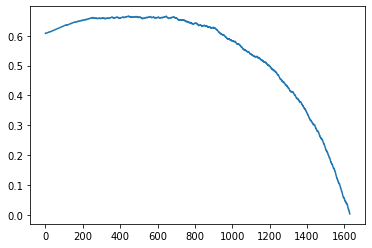

In [202]:
f1_scores = 2*recall[:-1]*precision[:-1]/(recall[:-1]+precision[:-1])
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print(precision[16])
print(recall[16])
print(f1_scores=='nan')
print(np.argmax(f1_scores))
print('Best F1-Score: ', np.max(f1_scores))
plt.plot(f1_scores)

In [243]:
tmp_R = pd.read_csv(os.getcwd()+"/results1/ecnn1/sb1d3_t2_T2.csv")

## Evaluation of rejection-based performance
true = np.array(tmp_R['actual'])
pred = np.array(tmp_R['predict'])
un = tmp_R['overall']
conf = 1-un
Y_test = true == pred
n_total = len(true) # total samples
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, conf)

f1_scores = 2*recall*precision/(recall+precision)

th_index = np.argmax(f1_scores)
determined_threshold = thresholds[th_index]
print('Best threshold: ', determined_threshold)

print('determined precision: ', precision[th_index])
print('determined recall: ', recall[th_index])
print('Best F1-Score: ', np.max(f1_scores))



valid_pred = un < determined_threshold
n_accepted = np.sum(valid_pred)
TA_label = Y_test[valid_pred]
print(n_total)
#FR_label = 1-TA_label
TA = np.sum(TA_label) # True positive(accepted)
print(TA)
TR = np.sum(Y_test) - TA # True negative(rejected)
print(TR)
FA = n_accepted - TA # False positive(accepted)
print(FA)
FR = n_total - TA - TR - FA # False negative(rejected)
print(FR)
print(TA/n_accepted)
print(FR/(TR+FR))
print(1-n_accepted/n_total)

print(1 - FA/n_total)


Best threshold:  0.46030646562576294
determined precision:  0.6775956284153005
determined recall:  0.7967871485943775
Best F1-Score:  0.7323735695828719
2328
889
356
347
736
0.7192556634304207
0.673992673992674
0.4690721649484536
0.8509450171821306


In [223]:
n_total = len(Y_test)
valid_pred = (1-un) >= determined_threshold
n_accepted = np.sum(valid_pred) # total accepted samples
n_rejected = n_total-n_accepted
rr = np.rint(n_rejected/n_total*100) # rr:rejection rate
print(rr)
TA_label = Y_test[valid_pred]
TA = np.sum(TA_label)
print(TA/len(TA_label))


18.0
0.7932405566600398


In [265]:
## Functions for calculating accuracy
def get_acc_rej(model, sb, read_folder="/results"):
    
    day_n_list = []
    time_n_list = []
    trial_n_list = []
    RR_list = []
    threshold_list = []
    TAR_list = []
    TRR_list = []
    acc_rej_list = []
    stability_rej_list = []
    
    for day_n in range(2,6):
        for t_n in range(1,3):
            for T_n in range(1,13):
                tmp_R = pd.read_csv(os.getcwd()+f"{read_folder}/{model}/sb{sb}d{day_n}_t{t_n}_T{T_n}.csv")
                
                '''
                day_n_list.append(day_n)
                time_n_list.append('AM') if t_n == 1 else time_n_list.append('PM')
                trial_n_list.append(T_n)
                '''
                ## Evaluation of rejection-based performance
                true = np.array(tmp_R['actual'])
                pred = np.array(tmp_R['predict'])
                un = tmp_R['overall']
                conf = 1-un
                Y_test = true == pred
                

                '''
                n_total = len(true) # total samples
                #precision, recall, thresholds = metrics.precision_recall_curve(Y_test, conf)
                #f1_scores = 2*recall*precision/(recall+precision)
                #th_index = np.argmax(f1_scores)
                fpr, tpr, thresholds = metrics.roc_curve(Y_test, conf)
                gmean = np.sqrt(tpr*(1-fpr))
                th_index = np.argmax(gmean)
                determined_threshold = thresholds[th_index]
                
                # print('Best threshold: ', determined_threshold)

                # print('determined precision: ', precision[determined_index])
                # print('determined recall: ', recall[determined_index])
                # print('Best F1-Score: ', np.max(f1_scores))

                threshold_list.append(determined_threshold)

                TAR_list.append(precision[th_index])
                
                valid_pred = conf >= determined_threshold
                TA_label = Y_test[valid_pred]
                n_accepted = len(TA_label)
                n_rejected = n_total-n_accepted
                #FR_label = 1-TA_label
                TA = np.sum(TA_label) # True positive(accepted)
                TR = np.sum(Y_test) - TA # True negative(rejected)
                FA = n_accepted - TA # False positive(accepted)
                FR = n_rejected - TR # False negative(rejected)
                TRR_list.append(FR/n_rejected)
                RR_list.append(n_rejected/n_total)
                stability_rej_list.append(cal_stability(pred[valid_pred], true[valid_pred]))
                acc_rej_list.append(1 - FA/n_total)
                
                '''
                
                # based on fixed rejection rate
                threshold_index = np.arange(0.4, 1, 0.01)
                n_total = len(true) # total samples
                expected_rr_list = [5, 10 ,15, 20]
                
                for threshold in threshold_index:
                    valid_pred = un < threshold
                    n_accepted = np.sum(valid_pred) # total accepted samples
                    n_rejected = n_total-n_accepted
                    rr = np.rint(n_rejected/n_total*100) # rr:rejection rate
                    if rr in expected_rr_list:
                        day_n_list.append(day_n)
                        time_n_list.append('AM') if t_n == 1 else time_n_list.append('PM')
                        trial_n_list.append(T_n)
                        
                        RR_list.append(rr)
                        threshold_list.append(threshold)
                        ## to be continued, cal TAR, acc_reject, stability
                        valid_pred = un < threshold
                        TA_label = Y_test[valid_pred]
                        n_accepted = len(TA_label)
                        n_rejected = n_total-n_accepted
                        #FR_label = 1-TA_label
                        TA = np.sum(TA_label) # True positive(accepted)
                        TR = np.sum(Y_test) - TA # True negative(rejected)
                        FA = n_accepted - TA # False positive(accepted)
                        FR = n_rejected - TR # False negative(rejected)
                        TRR_list.append(FR/n_rejected)
                        TAR_list.append(TA/n_accepted)
                        acc_rej_list.append(1 - FA/n_total)
                        stability_rej_list.append(cal_stability(pred[valid_pred], true[valid_pred]))
                        expected_rr_list.remove(rr)
                        if len(expected_rr_list)==0:
                            break


    n = len(TAR_list)
    acc_rej_dict={
            'model': [model]*n,
            'sb': [sb]*n,
            'day': day_n_list,
            'time': time_n_list,
            'trial': trial_n_list,
            'threshold': threshold_list,
            'RR': RR_list,
            'TAR': TAR_list,
            'TRR': TRR_list,
            'acc_rej': acc_rej_list,
            'stability': stability_rej_list
    }
    
    #df_new = pd.DataFrame(acc_dict, index=np.arange(0,n,1))
    df = pd.DataFrame(acc_rej_dict)
    return df



In [266]:
folder = "/results1"
filename = f'./analysis/acc_rej1_report.csv'
models = ['ecnn0', 'ecnn1', 'ecnn2', 'ecnn3', 'etcn0', 'etcn1', 'etcn2', 'etcn3']
for i in models:
    df_new = get_acc_rej(model=i, sb=1, read_folder=folder)
    if os.path.exists(filename):
        print('Update new')
        df = pd.read_csv(filename)
        #df = df.append(df_new, ignore_index=True)
        df = pd.concat([df, df_new], ignore_index=True)
    else:
        print('Create new')
        df = df_new
    df.to_csv(filename, index=False)

df_acc_rej = pd.read_csv(filename)



Create new
Update new
Update new
Update new
Update new
Update new
Update new
Update new


In [112]:
folder = "/results1"
filename = f'./analysis/acc_rej1_report.csv'
df_new = get_acc_rej(model='ecnn0', sb=1, read_folder=folder)
if os.path.exists(filename):
    print('Update new')
    df = pd.read_csv(filename)
    #df = df.append(df_new, ignore_index=True)
    df = pd.concat([df, df_new], ignore_index=True)
else:
    print('Create new')
    df = df_new
df.to_csv(filename, index=False)
df_acc_rej = pd.read_csv(filename)

Update new


In [136]:
df_acc_rej = pd.read_csv(filename)

In [246]:
df_acc_rej

model  sb  day time  trial  threshold        RR       TAR       TRR  \
0    ecnn0   1    2   AM      1   0.523086  0.126675  0.793241  0.676282   
1    ecnn0   1    2   AM      2   0.487566  0.188727  0.766272  0.612832   
2    ecnn0   1    2   AM      3   0.516590  0.113572  0.815902  0.691489   
3    ecnn0   1    2   AM      4   0.478259  0.210941  0.728419  0.634578   
4    ecnn0   1    2   AM      5   0.547346  0.084518  0.798020  0.754808   
..     ...  ..  ...  ...    ...        ...       ...       ...       ...   
763  etcn3   1    5   PM      8   0.243830  0.848963  0.691913  0.507820   
764  etcn3   1    5   PM      9   0.249344  0.683564  0.769083  0.581112   
765  etcn3   1    5   PM     10   0.258695  0.832240  0.684284  0.576639   
766  etcn3   1    5   PM     11   0.197378  0.776480  0.744839  0.474585   
767  etcn3   1    5   PM     12   0.223013  0.860297  0.692415  0.538006   

      acc_rej  stability  
0    0.796184   0.860000  
1    0.819624   0.888260  
2    0.821990   0.883636  
3    0.803564   0.879138  
4    0.771231   0.872558  
..        ...        ...  
763  0.969710   0.983471  
764  0.982178   0.994987  
765  0.972929   0.985294  
766  0.991945   0.996390  
767  0.988960   0.987805  

[768 rows x 11 columns]

In [137]:
temp = df_acc_rej[(df_acc_rej['RR']==10) & (df_acc_rej['day'] !=1) & (df_acc_rej['model'] =='ecnn1')]

In [165]:
filename = './analysis/stability_report1.csv' 
df_stability1 = pd.read_csv(filename)
df_stability_summary1 = df_stability1[df_stability1['day'] !=1].groupby(by=['day', 'time','model']).mean().unstack()
df_stability_summary1['stability'].to_clipboard(header=False)

In [167]:
filename = './analysis/acc_report1.csv' 
df_acc1 = pd.read_csv(filename)
df_acc_summary1 = df_acc1[df_acc1['day'] !=1].groupby(by=['day', 'time','model']).mean().unstack()
df_acc_summary1['acc'].to_clipboard(header=False)

In [173]:
filename = './analysis/reliability_report1.csv' 
df_reliability1 = pd.read_csv(filename)
df_reliability_summary1 = df_reliability1[df_reliability1['day'] !=1].groupby(by=['day', 'time','model']).mean().unstack()
df_reliability_summary1['overall'].to_clipboard(header=True)

In [177]:
temp = 2/(1/df_reliability_summary1['overall'] + 1/df_acc_summary1['acc'])
temp.to_clipboard(header=True)


In [298]:
df_acc_rej_summary = df_acc_rej[df_acc_rej['RR']==15].groupby(by=['day', 'time','model']).mean().unstack()


In [299]:
output = 'stability' # 'acc_rej' #'TAR'
df_acc_rej_summary[output].to_clipboard(header=False)

In [153]:
df_acc_rej_summary['TAR'].to_clipboard()


In [300]:
df_acc_rej_summary['acc_rej']


model        ecnn0     ecnn1     ecnn2     ecnn3     etcn0     etcn1  \
day time                                                               
2   AM    0.784844  0.799902  0.790440  0.791645  0.760697  0.748859   
    PM    0.761571  0.744660  0.693665  0.713339  0.733583  0.700148   
3   AM    0.763987  0.748898  0.692455  0.726448  0.720400  0.733643   
    PM    0.633452  0.629870  0.610693  0.626995  0.482534  0.546450   
4   AM    0.769829  0.763589  0.719213  0.731321  0.750421  0.750199   
    PM    0.793949  0.786962  0.792402  0.800120  0.740572  0.749013   
5   AM    0.726500  0.716815  0.647693  0.670457  0.634991  0.638317   
    PM    0.747025  0.735115  0.706252  0.712813  0.675697  0.682678   

model        etcn2     etcn3  
day time                      
2   AM    0.670628  0.728326  
    PM    0.656357  0.700285  
3   AM    0.604196  0.690442  
    PM    0.499199  0.502003  
4   AM    0.658870  0.721855  
    PM    0.613799  0.714662  
5   AM    0.594637  0.519641  
    PM    0.676139  0.657784

In [148]:
df_acc_rej_summary['stability']

model        ecnn0     ecnn1     ecnn2     ecnn3     etcn0     etcn1  \
day time                                                               
2   AM    0.873849  0.904212  0.882347  0.870221  0.858152  0.857710   
    PM    0.863569  0.899242  0.875634  0.865729  0.840238  0.851426   
3   AM    0.853664  0.897954  0.869211  0.853941  0.834478  0.853650   
    PM    0.813665  0.877412  0.839295  0.817151  0.812274  0.837577   
4   AM    0.876420  0.902615  0.880551  0.869962  0.852042  0.868746   
    PM    0.898710  0.918507  0.912454  0.906551  0.856234  0.856800   
5   AM    0.849874  0.888323  0.867051  0.845162  0.812309  0.838185   
    PM    0.872137  0.906377  0.874317  0.862948  0.834827  0.850173   

model        etcn2     etcn3  
day time                      
2   AM    0.839601  0.848986  
    PM    0.818654  0.853597  
3   AM    0.836950  0.850389  
    PM    0.830060  0.860214  
4   AM    0.840691  0.863688  
    PM    0.852452  0.854768  
5   AM    0.801086  0.840837  
    PM    0.829735  0.857268

In [6]:
read_folder= '/results1'
model = 'ecnn1'
sb = 1
day_n = 2
t_n = 1
T_n = 1
tmp_R = pd.read_csv(os.getcwd()+f"{read_folder}/{model}/sb{sb}d{day_n}_t{t_n}_T{T_n}.csv")


In [29]:
true = tmp_R['actual']
pred = tmp_R['predict']
un = tmp_R['overall']


Y_test = true == pred
threshold_index = np.arange(0.7, 1, 0.001)
n_threshold = len(threshold_index)

n = len(true) # total samples


reject_results = np.zeros((3,n_threshold))
for index, threshold in enumerate(threshold_index):
    valid_pred = un < threshold
    n_accepted = np.sum(valid_pred) # total accepted samples
    n_rejected = n-n_accepted
    rr = n_rejected/n
    if np.rint(rr*100) == 10:
        valid_threshold = threshold





In [33]:
valid_pred = un < valid_threshold
n_accepted = np.sum(valid_pred)
TA_label = valid_pred == Y_test
FR_label = 1-TA_label

TA = np.sum(TA_label)
FR = np.sum(Y_test) - TA
FA = n_accepted - TA
TR = n - TA - FR - FA

TAR = TA/n_accepted
acc_reject = 1 - FA/n

print(TAR)
print(acc_reject)



0.8197752808988764
0.8371904181892001


In [48]:

#print(valid_pred)
#print(tmp)
#print(pred)
pred = np.array(pred)
true = np.array(true)
stability = cal_stability(pred[valid_pred], true[valid_pred])

print(stability)

0.8898381294964028


In [34]:
filename = f'./analysis/acc_report.csv'
df_acc = pd.read_csv(filename)
print(df_acc)

      model  sb  day time  trial       acc
0     ecnn0   1    1   AM      1  0.984706
1     ecnn0   1    1   AM      2  0.988289
2     ecnn0   1    1   AM      3  0.789075
3     ecnn0   1    1   AM      4  0.984622
4     ecnn0   1    1   AM      5  0.989637
...     ...  ..  ...  ...    ...       ...
1915  etcn3   1    5   PM      8  0.546473
1916  etcn3   1    5   PM      9  0.585743
1917  etcn3   1    5   PM     10  0.521329
1918  etcn3   1    5   PM     11  0.623842
1919  etcn3   1    5   PM     12  0.529087

[1920 rows x 6 columns]


In [2]:
## Functions for calculating reliability
def cal_minAP(n_pos, n_neg):
    # theoretical minimum average precision
    AP_min = 0.0
    for i in range(1, n_pos + 1):
        AP_min += i / (i + n_neg)
    AP_min = AP_min / n_pos
    return AP_min

def cal_mis_pm(labels, scores):
    #  calculate the misclassification performance measures
    #  include AUROC, AP, nAP
    #  labels: labels for postive or not
    #  scores: quantified uncertainty; dict
    n_sample = len(labels)  # the total number of predictions
    n_pos = np.sum(labels)  # the total number of positives
    n_neg = n_sample - n_pos  # the total number of negatives
    skew = n_pos / n_sample
    #AUROC = {key: [] for key in scores}
    AP = {key: [] for key in scores}
    nAP = {key: [] for key in scores}

    if skew == 0:  # No postive samples found
        #  PR curve makes no sense, record it but dont use it
        for un_type, un_score in scores.items():
            AP[un_type] = float("nan")  # AP
            nAP[un_type] = float("nan")  # normalised AP
    else:
        minAP = cal_minAP(n_pos, n_neg)
        for un_type, un_score in scores.items():
            #AUROC[un_type] = metrics.roc_auc_score(labels, un_score)
            AP[un_type] = metrics.average_precision_score(labels, un_score)
            #  normalised AP
            nAP[un_type] = (AP[un_type] - minAP) / (1 - minAP)
    return nAP

def get_R(model, sb, read_folder="/result"):
    day_n_list = []
    time_n_list = []
    trial_n_list = []
    
    R_nEntropy_list = []
    R_nnmp_list = []
    R_vac_list = []
    R_diss_list = []
    R_overall_list = []
    
    for day_n in range(1,6):
        for t_n in range(1,3):
            for T_n in range(1,13):
                tmp_R = pd.read_csv(os.getcwd()+f"{read_folder}/{model}/sb{sb}d{day_n}_t{t_n}_T{T_n}.csv") # results
                # columns of tmp_R: window, actual, predict, entropy, un_prob, (vacuity,dissonance,) overall
                day_n_list.append(day_n)
                time_n_list.append('AM') if t_n == 1 else time_n_list.append('PM')
                #time_n_list.append(t_n)
                trial_n_list.append(T_n)
                misclassification_labels = np.logical_not(tmp_R['actual'] == tmp_R['predict'])
                un_labels = list(set(tmp_R.columns) - set(['window', 'actual','predict']))
                
                scores = {}
                for un_type in un_labels:
                    scores[un_type] = tmp_R[un_type] 
                nAPs = cal_mis_pm(misclassification_labels, scores)
                #print(nAPs)
                R_nEntropy_list.append(nAPs['entropy'])
                R_nnmp_list.append(nAPs['un_prob'])
                R_vac_list.append(nAPs['vacuity']) if 'vacuity' in nAPs.keys() else R_vac_list.append(pd.NA)
                R_diss_list.append(nAPs['dissonance']) if 'dissonance' in nAPs.keys() else R_diss_list.append(pd.NA) 
                R_overall_list.append(nAPs['overall'])
    
    n = len(R_nEntropy_list)
    R_dict={
            'model': [model]*n,
            'sb': [sb]*n,
            'day': day_n_list,
            'time': time_n_list,
            'trial': trial_n_list,
            'nEntropy': R_nEntropy_list,
            'nnmp': R_nnmp_list,
            'vacuity': R_vac_list,
            'dissonance': R_diss_list,
            'overall': R_overall_list
    }
    
    #df_new = pd.DataFrame(acc_dict, index=np.arange(0,n,1))
    df = pd.DataFrame(R_dict)
    return df



In [6]:

folder = "/results10"
filename = f'./{folder}/reliability_report.csv'
models = ['ecnn0', 'ecnn1', 'ecnn2', 'ecnn3', 'etcn0', 'etcn1', 'etcn2', 'etcn3']

for i in models:
    df_new = get_R(model=i, sb=1, folder=folder)
    if os.path.exists(filename):
        print('Update new')
        df = pd.read_csv(filename)
        df = df.append(df_new, ignore_index=True)
    else:
        print('Create new')
        df = df_new
    df.to_csv(filename, index=False)
    
df_R = pd.read_csv(filename)


Create new
Update new
Update new
Update new
Update new
Update new
Update new
Update new


In [7]:
df_R_summary = df_R.groupby(by=['day', 'time','model']).mean().unstack()


In [8]:
df_R_summary['overall']

model        ecnn0     ecnn1     ecnn2     ecnn3     etcn0     etcn1  \
day time                                                               
1   AM    0.347622  0.431141  0.599976  0.588063  0.452456  0.499570   
    PM    0.408358  0.364623  0.461596  0.478054  0.423188  0.465020   
2   AM    0.526752  0.505199  0.555574  0.534847  0.569418  0.551655   
    PM    0.510960  0.488046  0.533948  0.504184  0.576952  0.537095   
3   AM    0.490521  0.472823  0.517198  0.491416  0.531830  0.525934   
    PM    0.540574  0.591676  0.485347  0.571259  0.520768  0.546409   
4   AM    0.529011  0.494096  0.575240  0.555967  0.571659  0.524256   
    PM    0.495406  0.457179  0.508347  0.514001  0.540703  0.510066   
5   AM    0.537466  0.495900  0.487460  0.541683  0.610396  0.581452   
    PM    0.554396  0.545570  0.546331  0.553537  0.599674  0.573078   

model        etcn2     etcn3  
day time                      
1   AM    0.647447  0.553625  
    PM    0.632596  0.525902  
2   AM    0.616652  0.609512  
    PM    0.615687  0.609266  
3   AM    0.582299  0.585958  
    PM    0.548843  0.557503  
4   AM    0.573504  0.579503  
    PM    0.569845  0.568068  
5   AM    0.589085  0.662584  
    PM    0.602736  0.637448

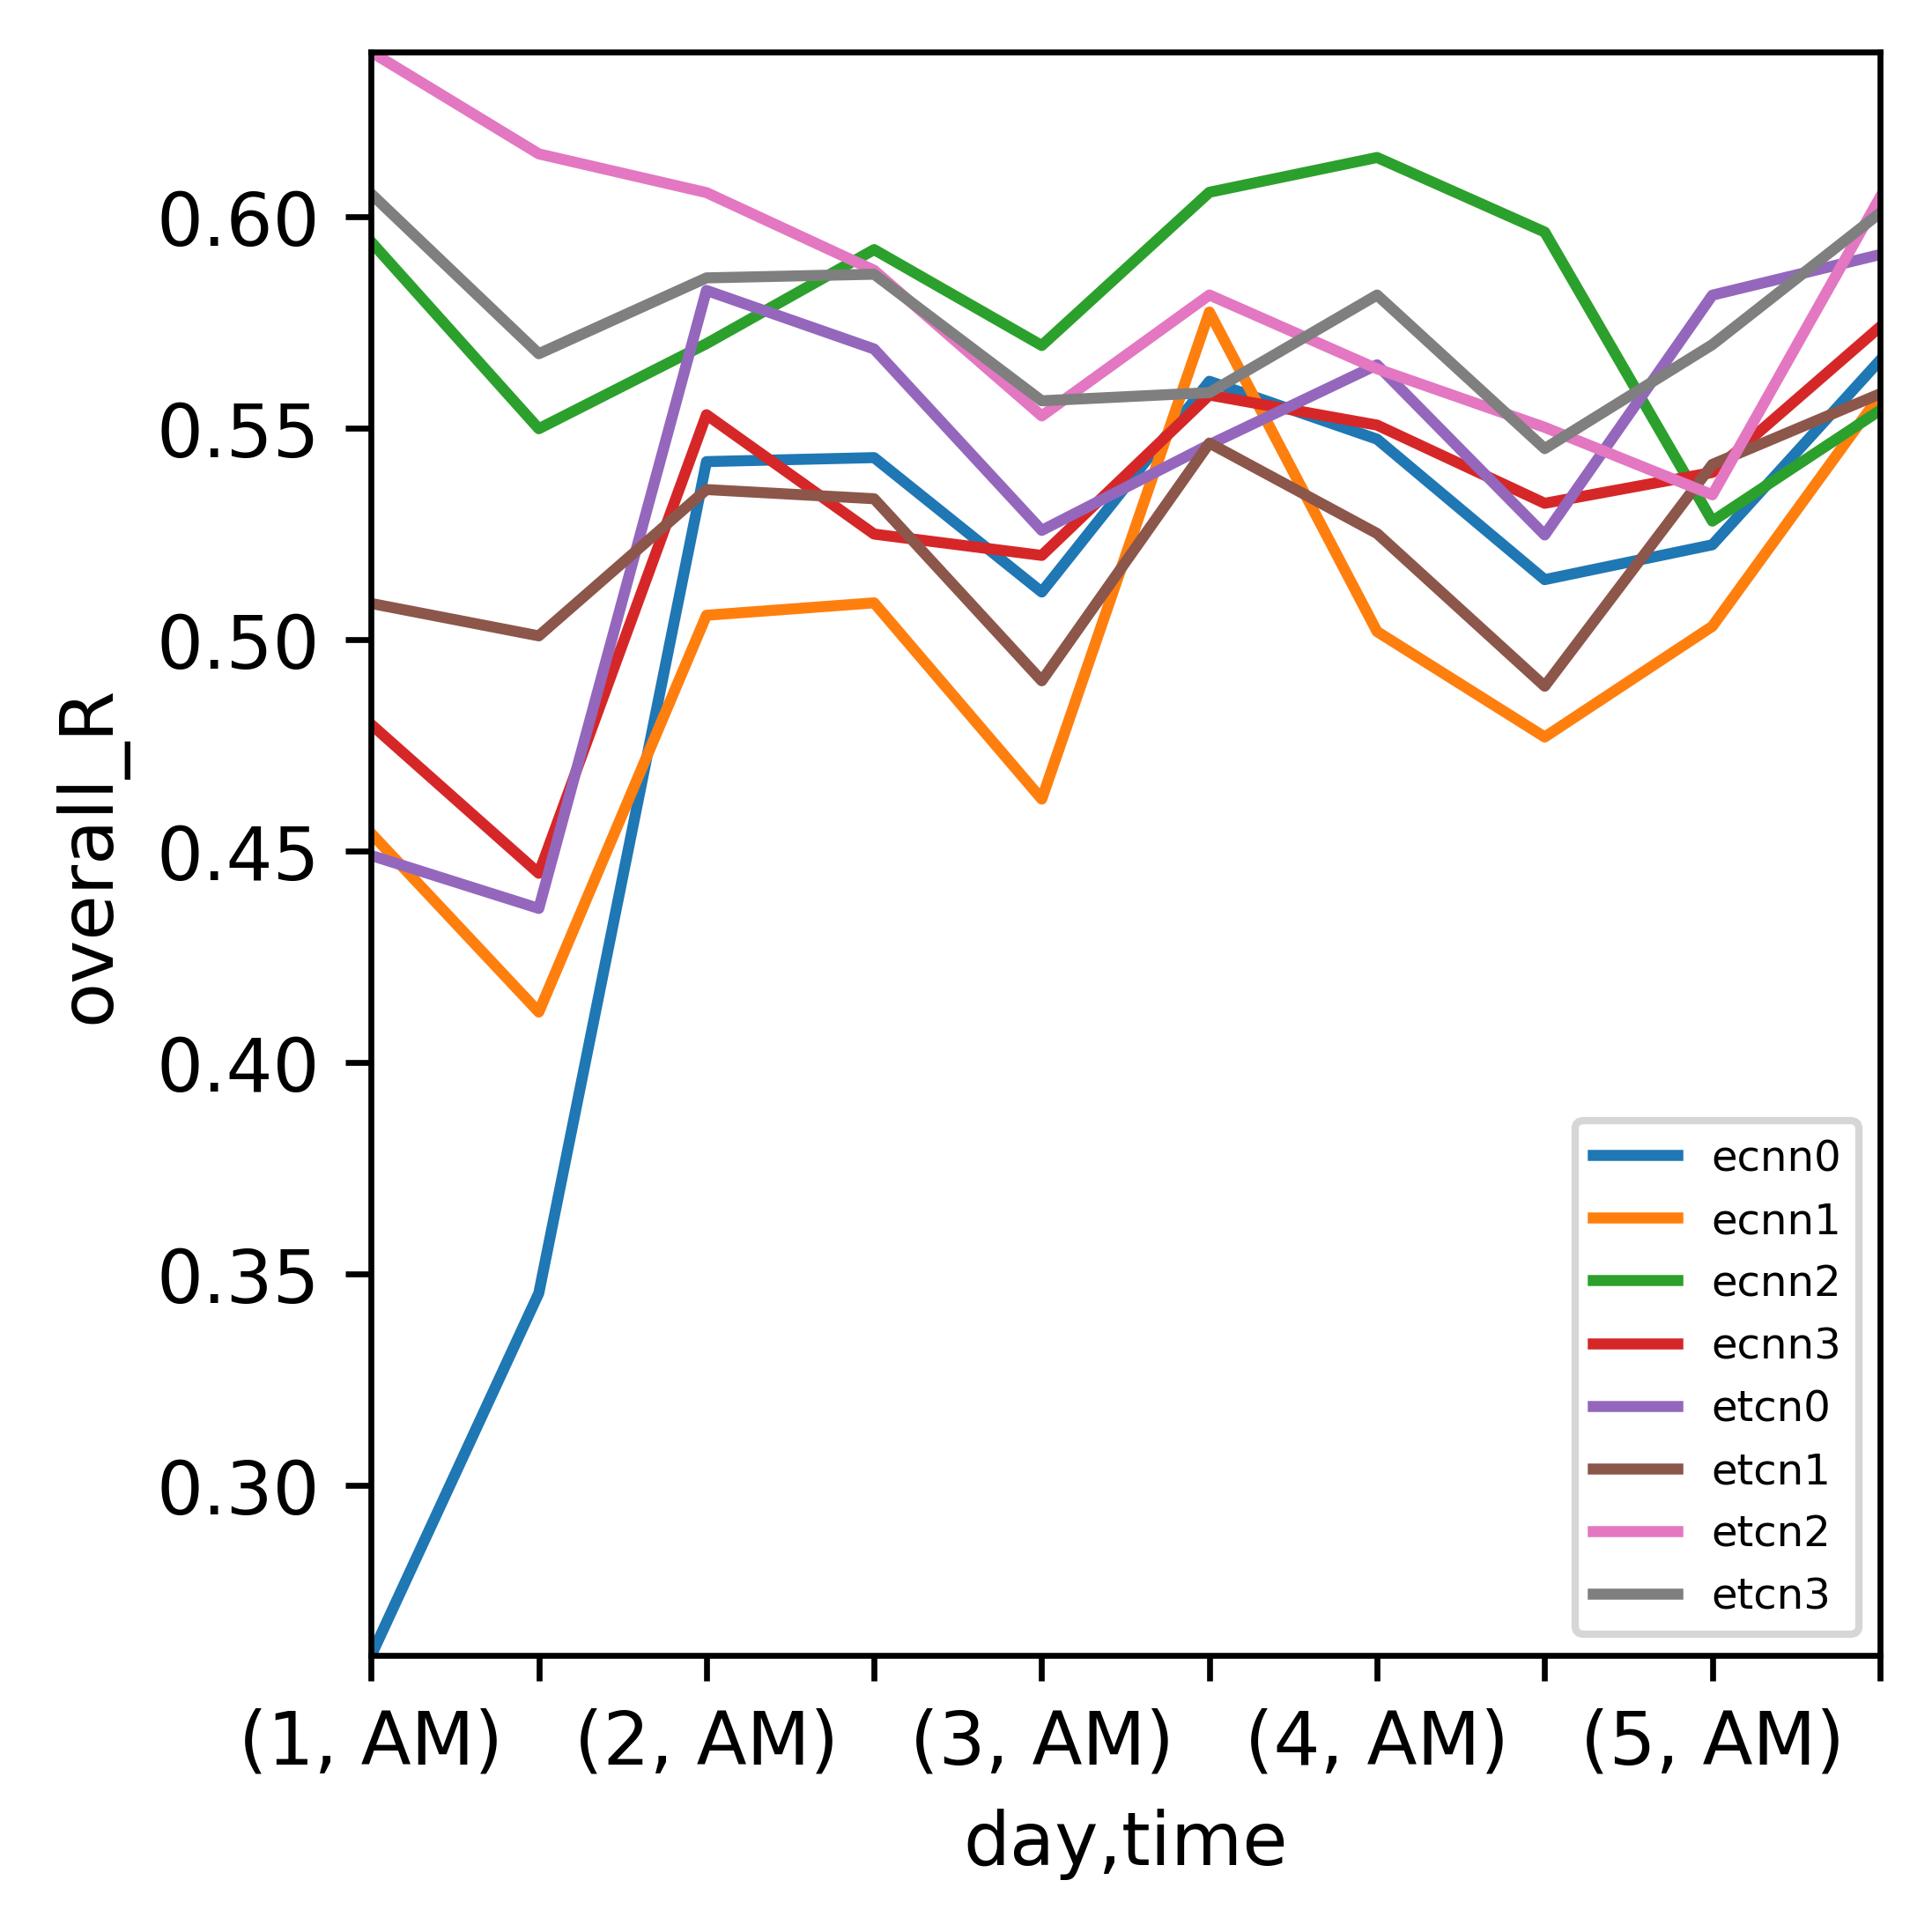

In [7]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)
df_R_summary['overall'].plot(kind='line', ylabel='overall_R', ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.autoscale(tight=True)
#ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
ax.legend(loc='best', fontsize='xx-small')
plt.savefig("./analysis/line-reliability.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)

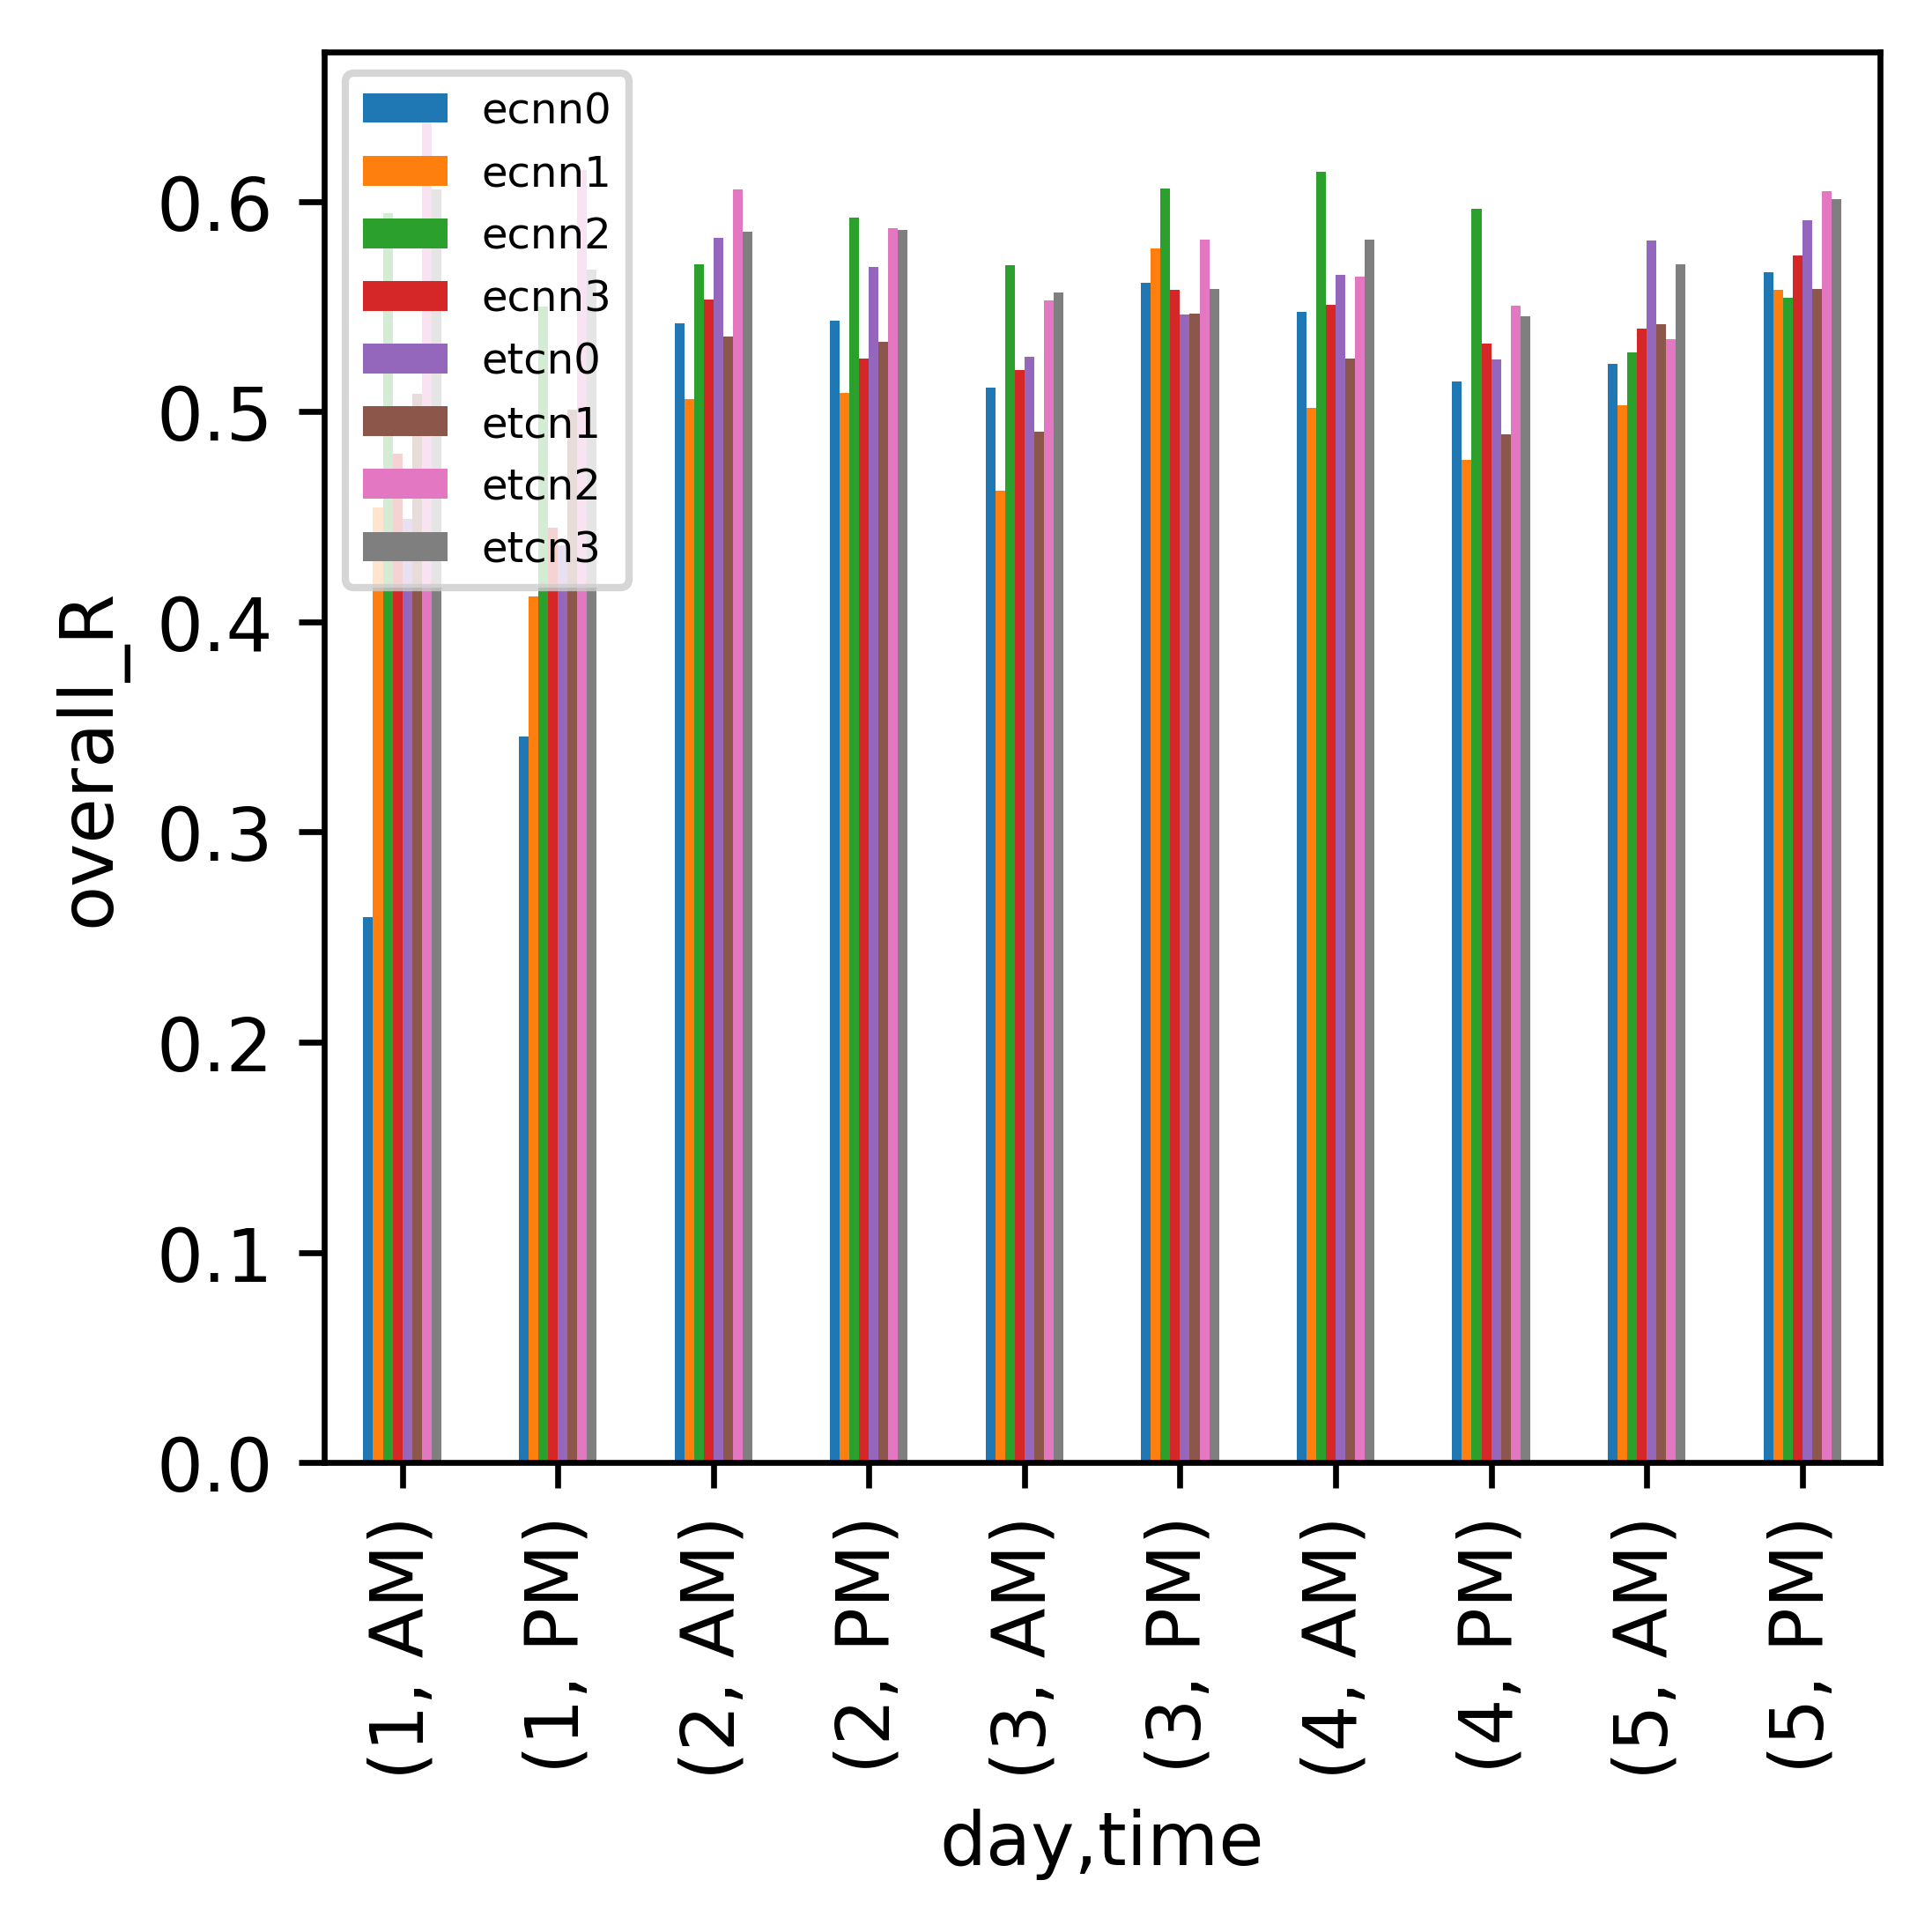

In [8]:
fig, ax = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)
df_R_summary['overall'].plot(kind='bar', ax=ax, ylabel='overall_R')
ax.legend(loc='best', fontsize='xx-small')
#plt.savefig("./results/bar-acc.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./analysis/bar-reliability.png", format='png', bbox_inches='tight', dpi=600)

In [15]:
## Functions for calculating accuracy
def get_acc(model, sb, read_folder="/results"):
    
    day_n_list = []
    time_n_list = []
    trial_n_list = []
    acc_list = []
    
    for day_n in range(1,6):
        for t_n in range(1,3):
            for T_n in range(1,13):
                tmp_R = pd.read_csv(os.getcwd()+f"{read_folder}/{model}/sb{sb}d{day_n}_t{t_n}_T{T_n}.csv")
                day_n_list.append(day_n)
                time_n_list.append('AM') if t_n == 1 else time_n_list.append('PM')
                #time_n_list.append(t_n)
                trial_n_list.append(T_n)
                acc_list.append(np.sum(tmp_R['actual'] == tmp_R['predict'])/len(tmp_R['predict']))
    
    n = len(acc_list)
    acc_dict={
            'model': [model]*n,
            'sb': [sb]*n,
            'day': day_n_list,
            'time': time_n_list,
            'trial': trial_n_list,
            'acc': acc_list
    }
    
    #df_new = pd.DataFrame(acc_dict, index=np.arange(0,n,1))
    df = pd.DataFrame(acc_dict)
    return df



Create new
Update new
Update new
Update new
Update new
Update new
Update new
Update new


In [ ]:
folder = "/results10"
filename = './analysis/acc_report1.csv'
models = ['ecnn0', 'ecnn1', 'ecnn2', 'ecnn3', 'etcn0', 'etcn1', 'etcn2', 'etcn3']

for i in models:
    df_new = get_acc(model=i, sb=1, read_folder=folder)
    if os.path.exists(filename):
        print('Update new')
        df = pd.read_csv(filename)
        df = df.append(df_new, ignore_index=True)
    else:
        print('Create new')
        df = df_new
    df.to_csv(filename, index=False)
    
df_acc = pd.read_csv(filename)

In [13]:
df_acc_summary = df_acc.groupby(by=['day', 'time','model']).mean().unstack()





In [14]:
df_acc_summary['acc']

model        ecnn0     ecnn1     ecnn2     ecnn3     etcn0     etcn1  \
day time                                                               
1   AM    0.979076  0.900124  0.854410  0.966213  0.818383  0.790998   
    PM    0.975744  0.899959  0.857286  0.968633  0.833824  0.782315   
2   AM    0.696593  0.704352  0.644231  0.696087  0.659361  0.659514   
    PM    0.665943  0.646167  0.607324  0.622314  0.621840  0.601192   
3   AM    0.657057  0.674261  0.592663  0.621078  0.634254  0.629316   
    PM    0.527716  0.534464  0.519883  0.526533  0.388232  0.418079   
4   AM    0.670435  0.672991  0.630249  0.639651  0.647526  0.650360   
    PM    0.688776  0.699545  0.643813  0.695132  0.649159  0.643063   
5   AM    0.618616  0.615761  0.548295  0.563833  0.521121  0.531309   
    PM    0.644415  0.638374  0.583663  0.608946  0.573971  0.574772   

model        etcn2     etcn3  
day time                      
1   AM    0.567310  0.728471  
    PM    0.556267  0.726400  
2   AM    0.550375  0.620936  
    PM    0.533645  0.602274  
3   AM    0.501280  0.579915  
    PM    0.398831  0.391149  
4   AM    0.518602  0.608910  
    PM    0.525074  0.602474  
5   AM    0.461845  0.455597  
    PM    0.507297  0.542335

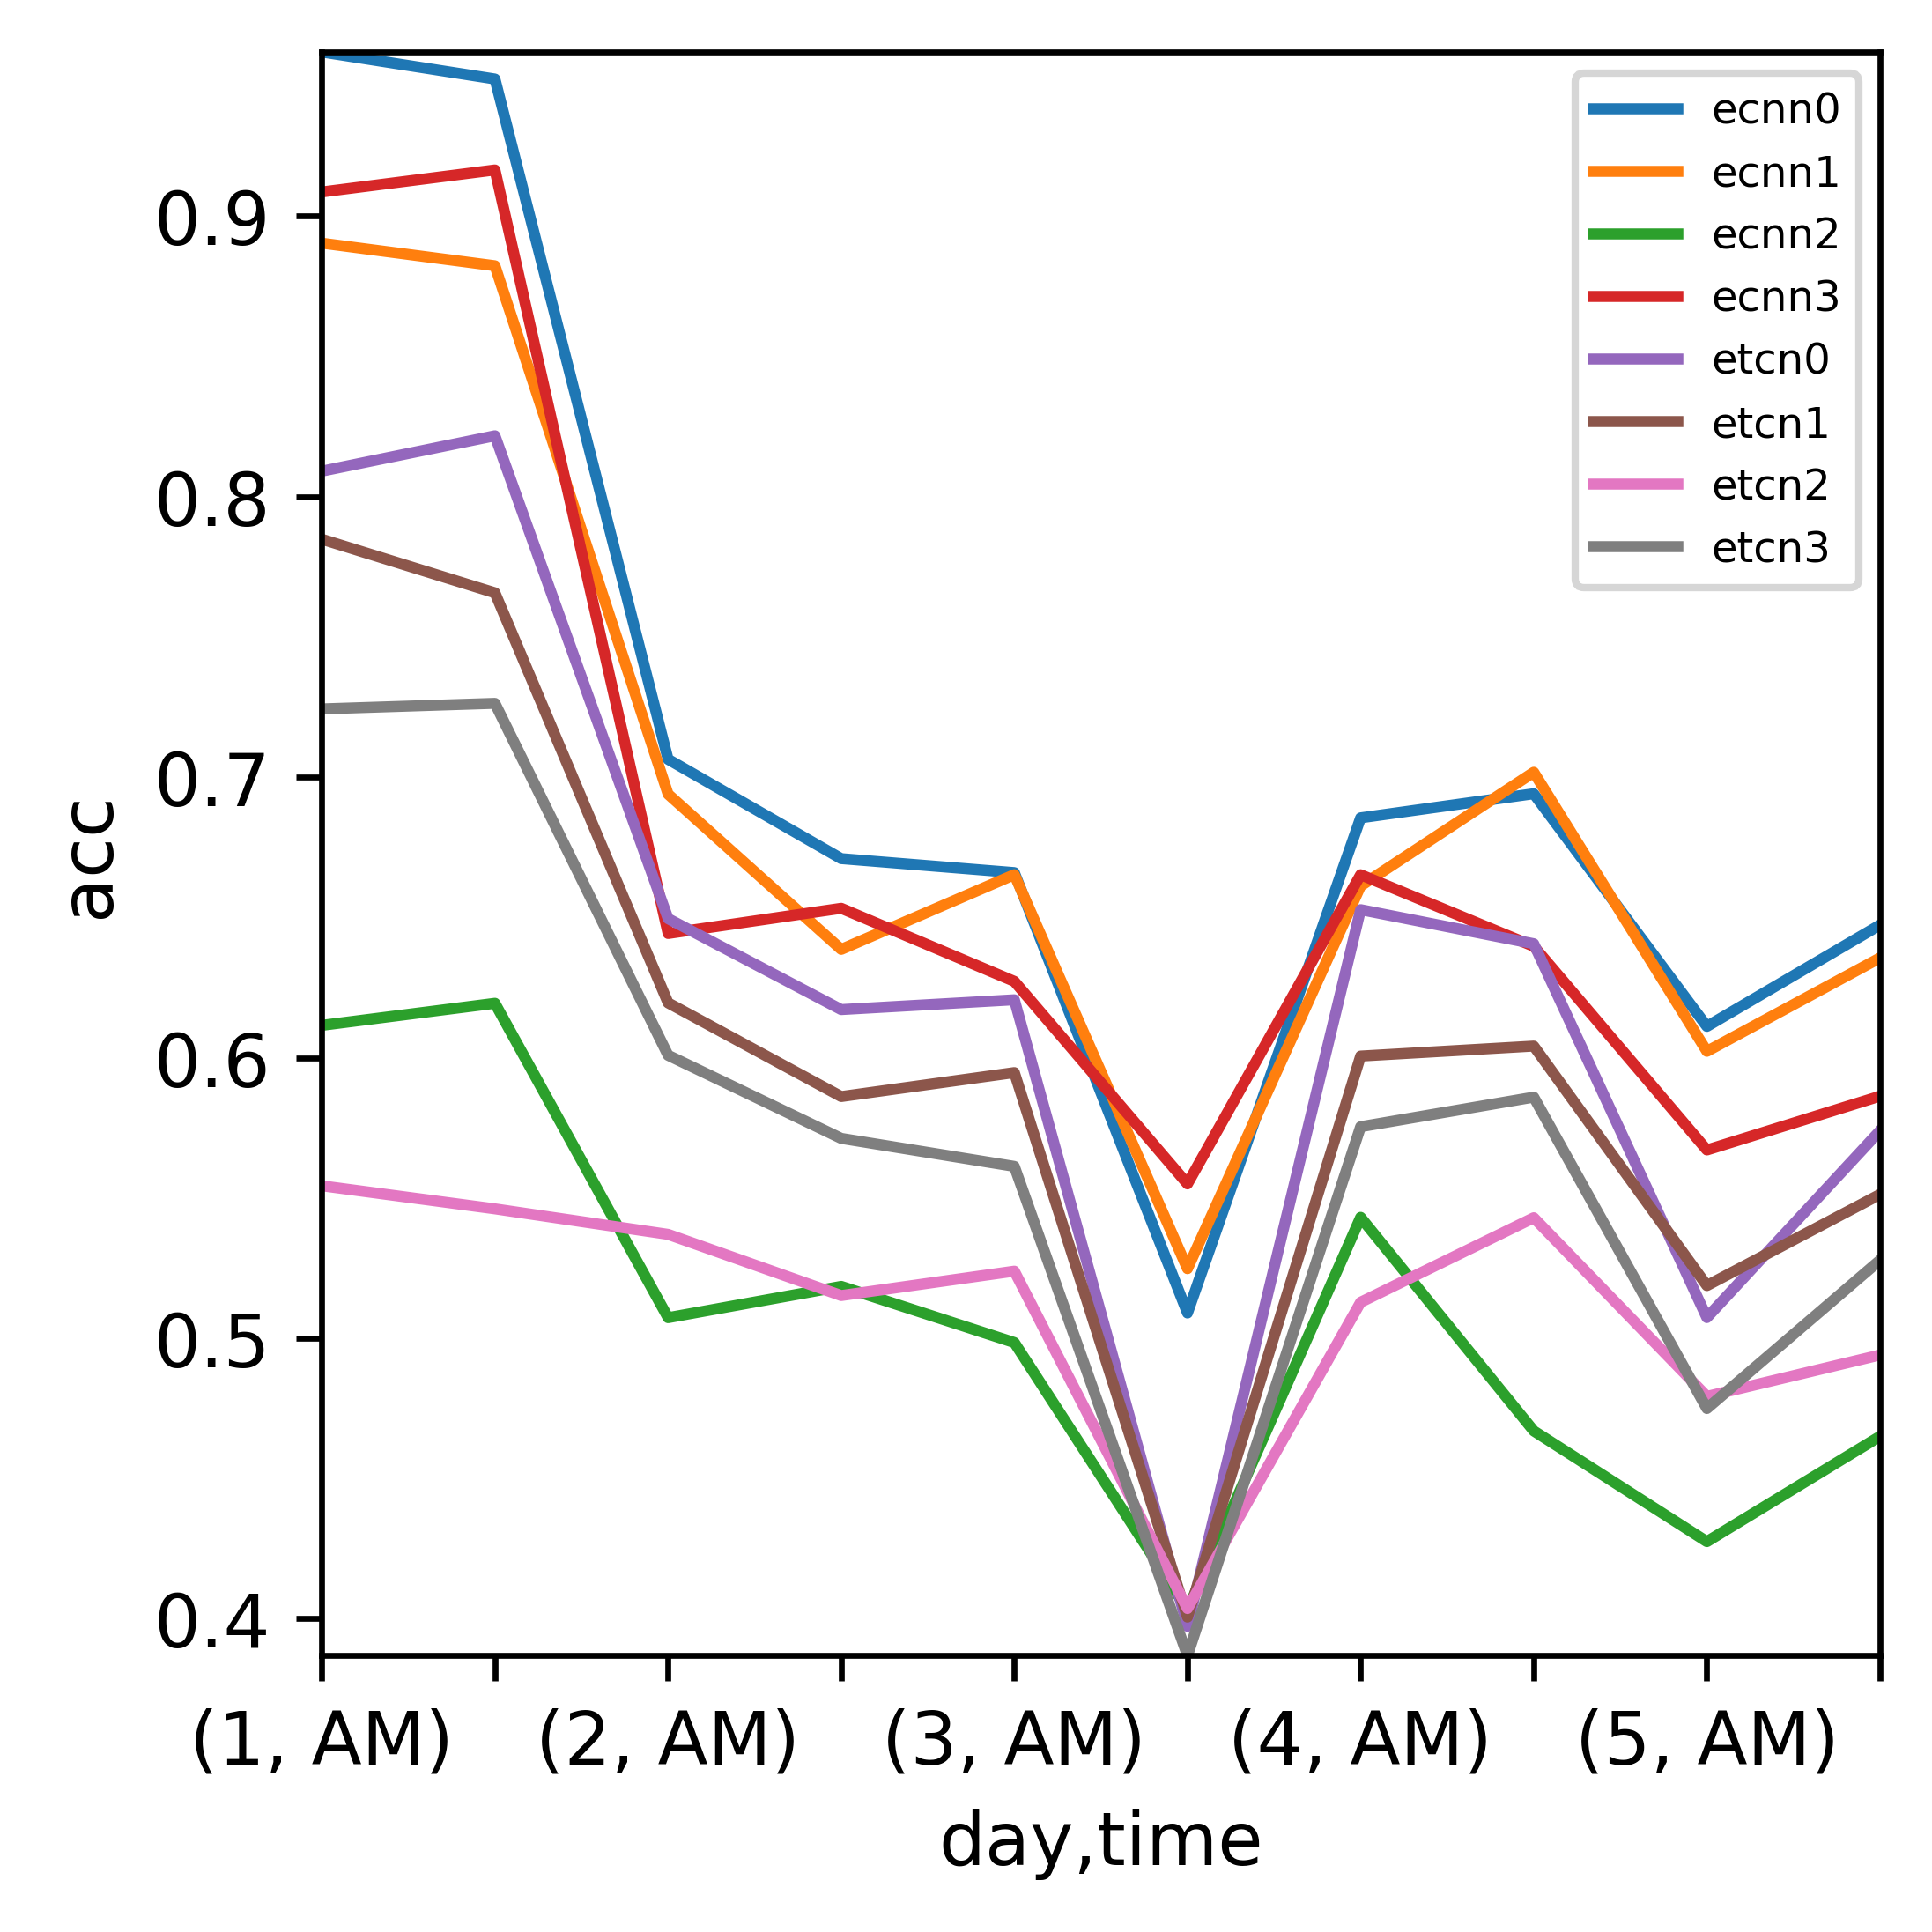

In [12]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)
#df_acc.groupby(['day','model']).mean().unstack().plot(kind='line', y='acc', ax=ax, rot=45, xticks=[1,2,3,4,5], ylabel='acc')
df_acc_summary['acc'].plot(kind='line', ylabel='acc', ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.autoscale(tight=True)
#ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
ax.legend(loc='best', fontsize='xx-small')
plt.savefig("./analysis/line-acc.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)

'\ni=0\nfor ax in axes.ravel():\n    #sns.heatmap(CM[i], ax = ax, cmap=\'GnBu\')\n    sns.\n    colorbar = True if i==1 or i==3 else False\n    sns.heatmap(CM_model_ave[i], ax = ax, annot=True, cmap=\'Blues\', vmax=1, vmin=0, fmt=\'.2%\', annot_kws={\'size\': 4}, cbar=colorbar)\n    i+=1\n\n\nlabels = [\'CNN\',\'ECNN-A\',\'ECNN-B\',\'ECNN-C\']\nfor ax, label in zip(axes.ravel(), labels):\n    ax.set_title(label,loc=\'center\', fontdict={\'fontsize\': 8})\n    ax.set_xlabel(\'Predicted Finger Movement\', fontdict={\'fontsize\': 8})\n    ax.set_ylabel(\'Acutal Finger Movement\', fontdict={\'fontsize\': 8})\n\nplt.savefig("./results/confusion_matrix_macroave.eps", format=\'eps\', bbox_inches=\'tight\', dpi=600, pad_inches=0.0)\nplt.savefig("./results/confusion_matrix_macroave.png", format=\'png\', bbox_inches=\'tight\', dpi=600, pad_inches=0.0)\n'

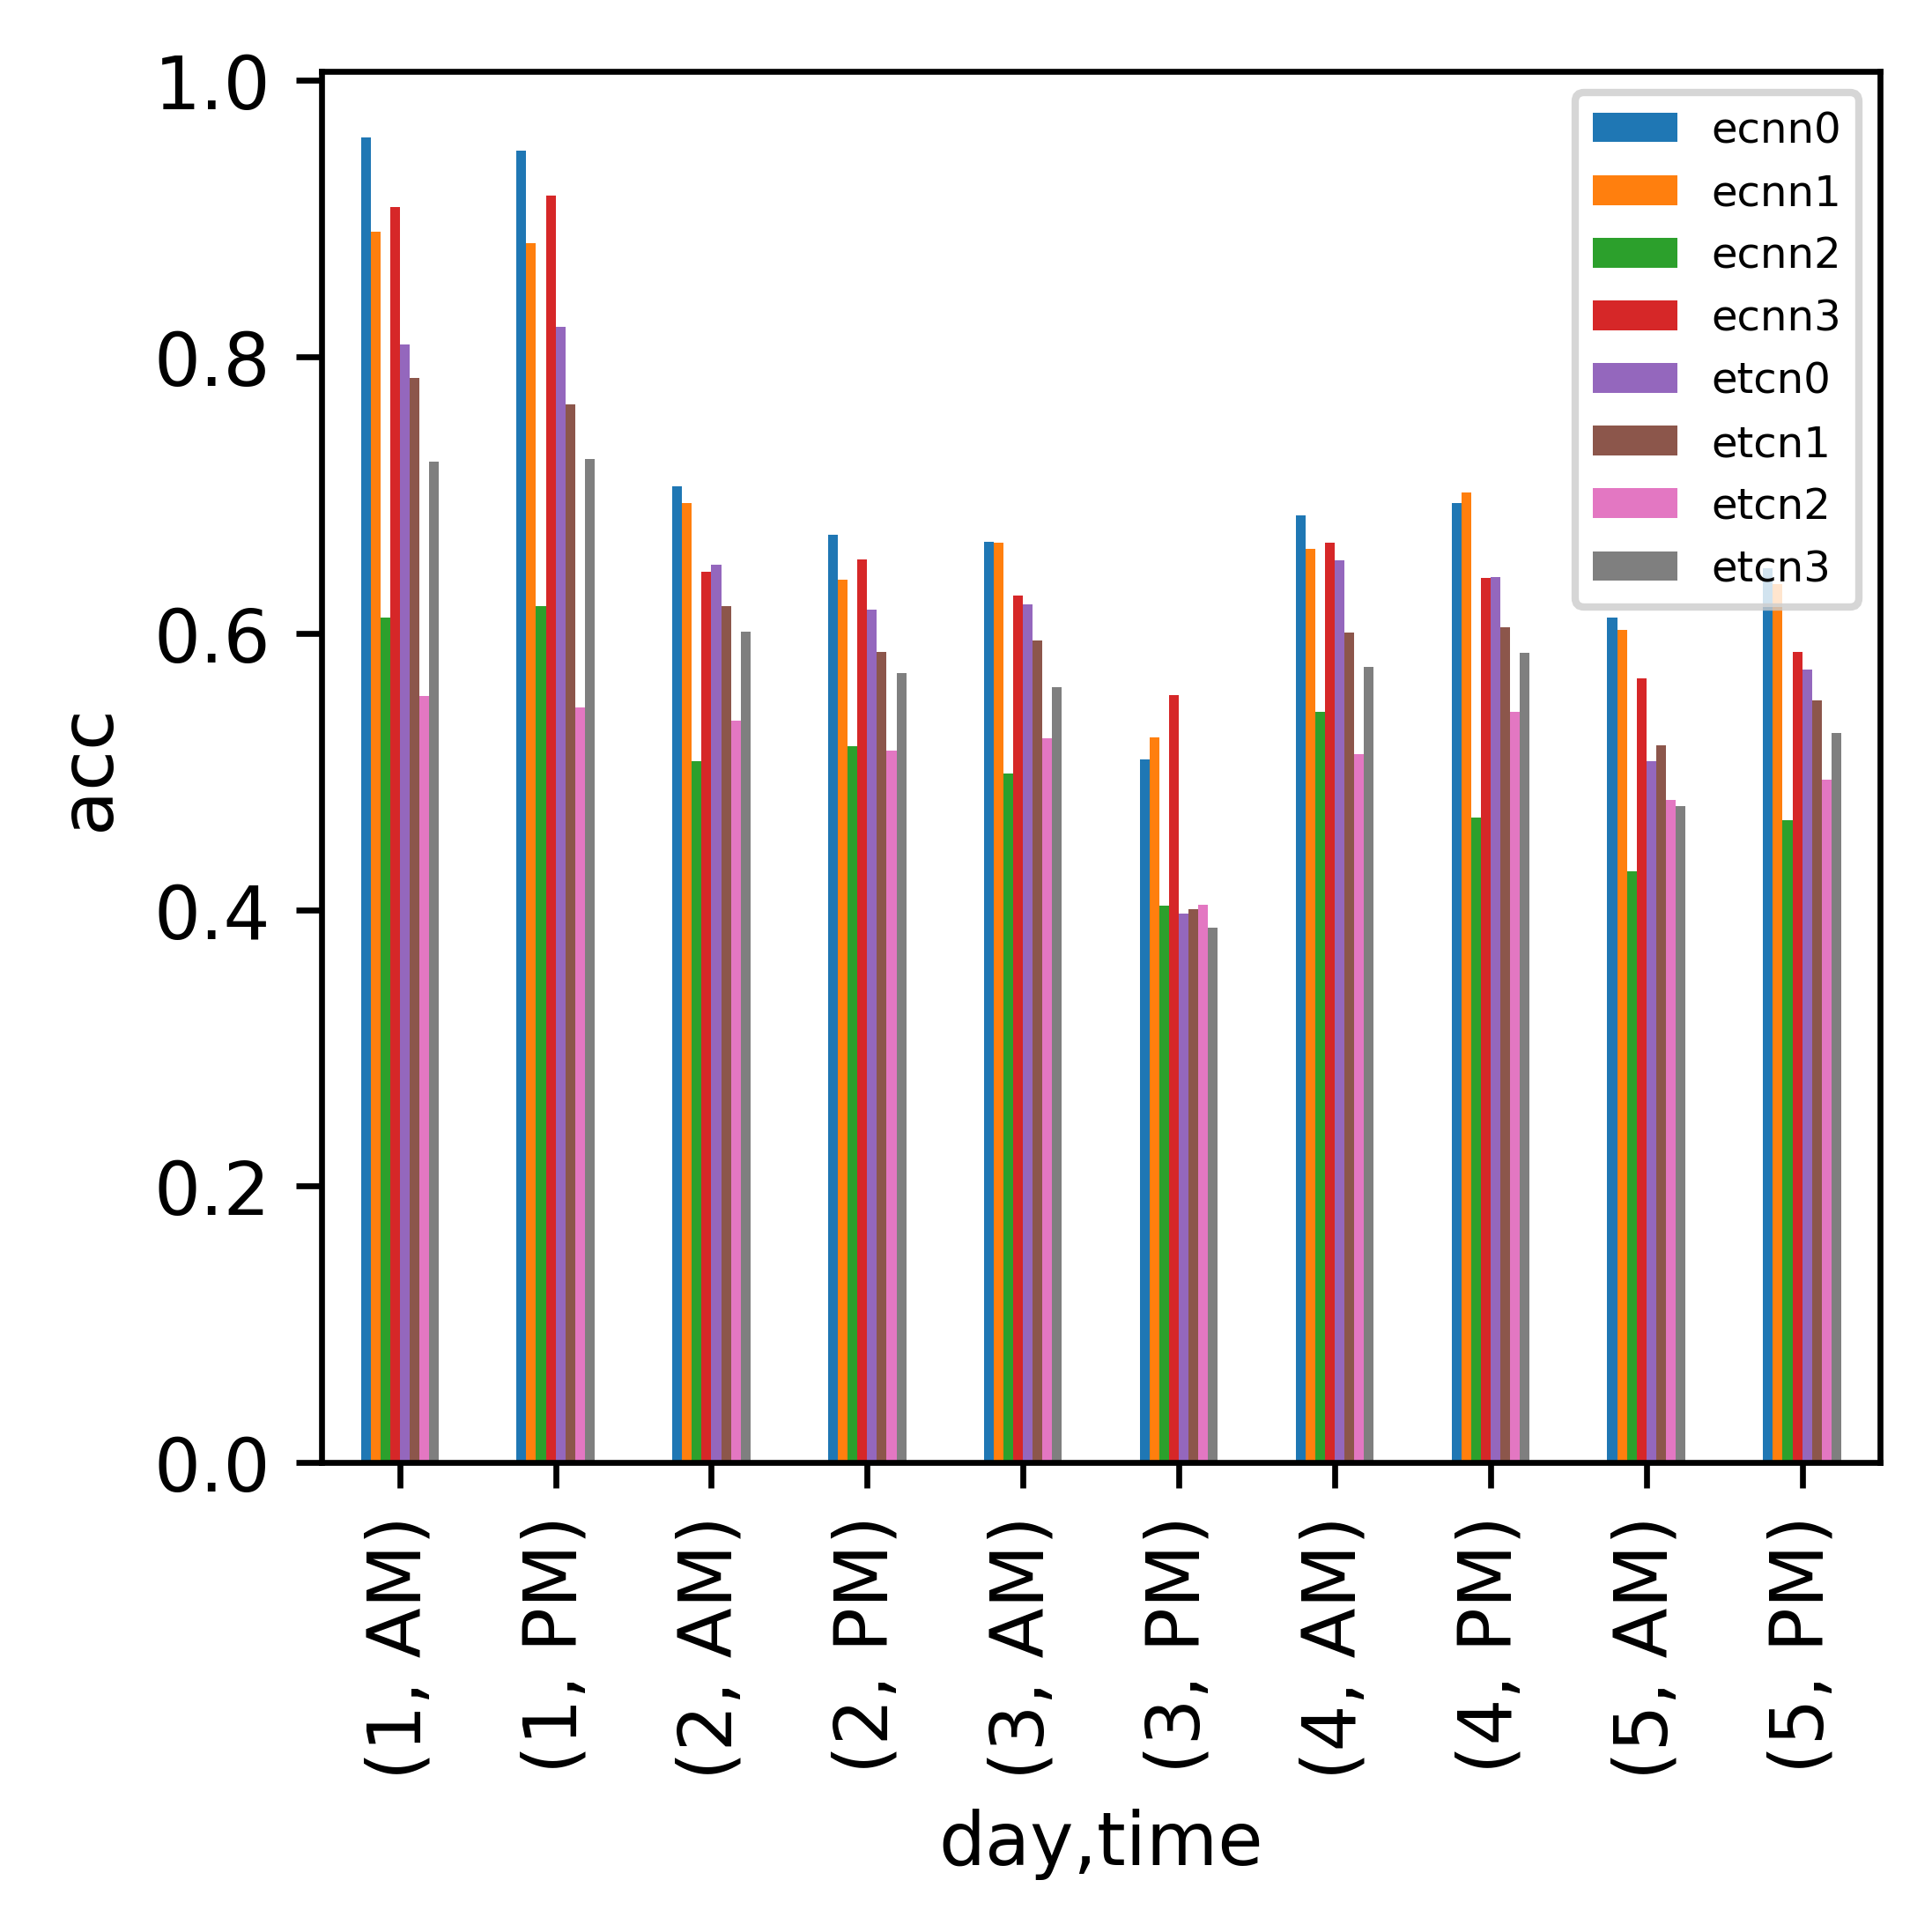

In [13]:

fig, ax = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)
df_acc_summary['acc'].plot(kind='bar', ax=ax, ylabel='acc')
ax.legend(loc='best', fontsize='xx-small')
#plt.savefig("./results/bar-acc.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./analysis/bar-acc.png", format='png', bbox_inches='tight', dpi=600)
#f, axes = plt.subplots(1,1, figsize = (7.08/2, 7.08/2), constrained_layout=True,dpi=600)

#df_acc.groupby('model').boxplot(x='day',y='acc')

#df_acc.loc[df_acc['model']=='ecnn0'].boxplot(column = ['acc'], by=['day', 'time'], rot=45)

#df_acc.loc[df_acc['model']=='ecnn0'].boxplot(column = ['acc'], by=['day', 'time'], rot=45)
#for ax in axes.ravel():
#    ax = df_acc.plot.bar(x='day', y='acc')

'''
i=0
for ax in axes.ravel():
    #sns.heatmap(CM[i], ax = ax, cmap='GnBu')
    sns.
    colorbar = True if i==1 or i==3 else False
    sns.heatmap(CM_model_ave[i], ax = ax, annot=True, cmap='Blues', vmax=1, vmin=0, fmt='.2%', annot_kws={'size': 4}, cbar=colorbar)
    i+=1


labels = ['CNN','ECNN-A','ECNN-B','ECNN-C']
for ax, label in zip(axes.ravel(), labels):
    ax.set_title(label,loc='center', fontdict={'fontsize': 8})
    ax.set_xlabel('Predicted Finger Movement', fontdict={'fontsize': 8})
    ax.set_ylabel('Acutal Finger Movement', fontdict={'fontsize': 8})

plt.savefig("./results/confusion_matrix_macroave.eps", format='eps', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./results/confusion_matrix_macroave.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)
'''

In [35]:
## Functions for calculating stability
def cal_stability(y_p, y_t):
    c_p = np.sum(1-(np.equal(y_p[1:], y_p[:-1])))
    c_t = np.sum(1-(np.equal(y_t[1:], y_t[:-1])))
    s = 1 - np.abs(c_p-c_t)/(y_p.shape[0]-1)
    return s

def get_stability(model, sb, read_folder="/results"):
    
    day_n_list = []
    time_n_list = []
    trial_n_list = []
    stability_list = []
    
    for day_n in range(1,6):
        for t_n in range(1,3):
            for T_n in range(1,13):
                tmp_R = pd.read_csv(os.getcwd()+f"{read_folder}/{model}/sb{sb}d{day_n}_t{t_n}_T{T_n}.csv")
                day_n_list.append(day_n)
                time_n_list.append('AM') if t_n == 1 else time_n_list.append('PM')
                #time_n_list.append(t_n)
                trial_n_list.append(T_n)
                stability_list.append(cal_stability(np.array(tmp_R['predict']), np.array(tmp_R['actual'])))

    
    n = len(stability_list)
    stability_dict={
            'model': [model]*n,
            'sb': [sb]*n,
            'day': day_n_list,
            'time': time_n_list,
            'trial': trial_n_list,
            'stability': stability_list
    }
    
    df = pd.DataFrame(stability_dict)
    return df



In [ ]:
folder = "/results10"
filename = './analysis/stability_report10.csv'
models = ['ecnn0', 'ecnn1', 'ecnn2', 'ecnn3', 'etcn0', 'etcn1', 'etcn2', 'etcn3']

for i in models:
    df_new = get_stability(model=i, sb=1, read_folder=folder)
    if os.path.exists(filename):
        print('Update new')
        df = pd.read_csv(filename)
        df = df.append(df_new, ignore_index=True)
    else:
        print('Create new')
        df = df_new
    df.to_csv(filename, index=False)
    
df_stability = pd.read_csv(filename)


In [20]:
df_stability_summary = df_stability.groupby(by=['day', 'time','model']).mean().unstack()

sb                                           trial        ...  \
model    ecnn0 ecnn1 ecnn2 ecnn3 etcn0 etcn1 etcn2 etcn3 ecnn0 ecnn1  ...   
day time                                                              ...   
1   AM     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.5   6.5  ...   
    PM     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.5   6.5  ...   
2   AM     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.5   6.5  ...   
    PM     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.5   6.5  ...   
3   AM     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.5   6.5  ...   

                     stability                                          \
model    etcn2 etcn3     ecnn0     ecnn1     ecnn2     ecnn3     etcn0   
day time                                                                 
1   AM     6.5   6.5  0.968624  0.937324  0.809284  0.923310  0.867353   
    PM     6.5   6.5  0.965219  0.937091  0.819359  0.927607  0.866268   
2   AM     6.5   6.5  0.834800  0.853018  0.778974  0.790843  0.815688   
    PM     6.5   6.5  0.821194  0.849373  0.785349  0.795885  0.809066   
3   AM     6.5   6.5  0.821537  0.849774  0.796564  0.786623  0.804740   

                                        
model        etcn1     etcn2     etcn3  
day time                                
1   AM    0.869062  0.809222  0.858478  
    PM    0.860782  0.768441  0.854097  
2   AM    0.826324  0.801304  0.818530  
    PM    0.826808  0.792023  0.822610  
3   AM    0.826649  0.806850  0.816915  

[5 rows x 24 columns]

In [4]:
filename = './analysis/stability_report.csv' 
df_stability = pd.read_csv(filename)
df_stability_summary = df_stability.groupby(by=['day', 'time','model']).mean().unstack()['stability']


filename = './analysis/stability_report1.csv' 
df_stability1 = pd.read_csv(filename)
df_stability_summary1 = df_stability1.groupby(by=['day', 'time','model']).mean().unstack()['stability']

filename = './analysis/stability_report10.csv' 
df_stability10 = pd.read_csv(filename)
df_stability_summary10 = df_stability10.groupby(by=['day', 'time','model']).mean().unstack()['stability']

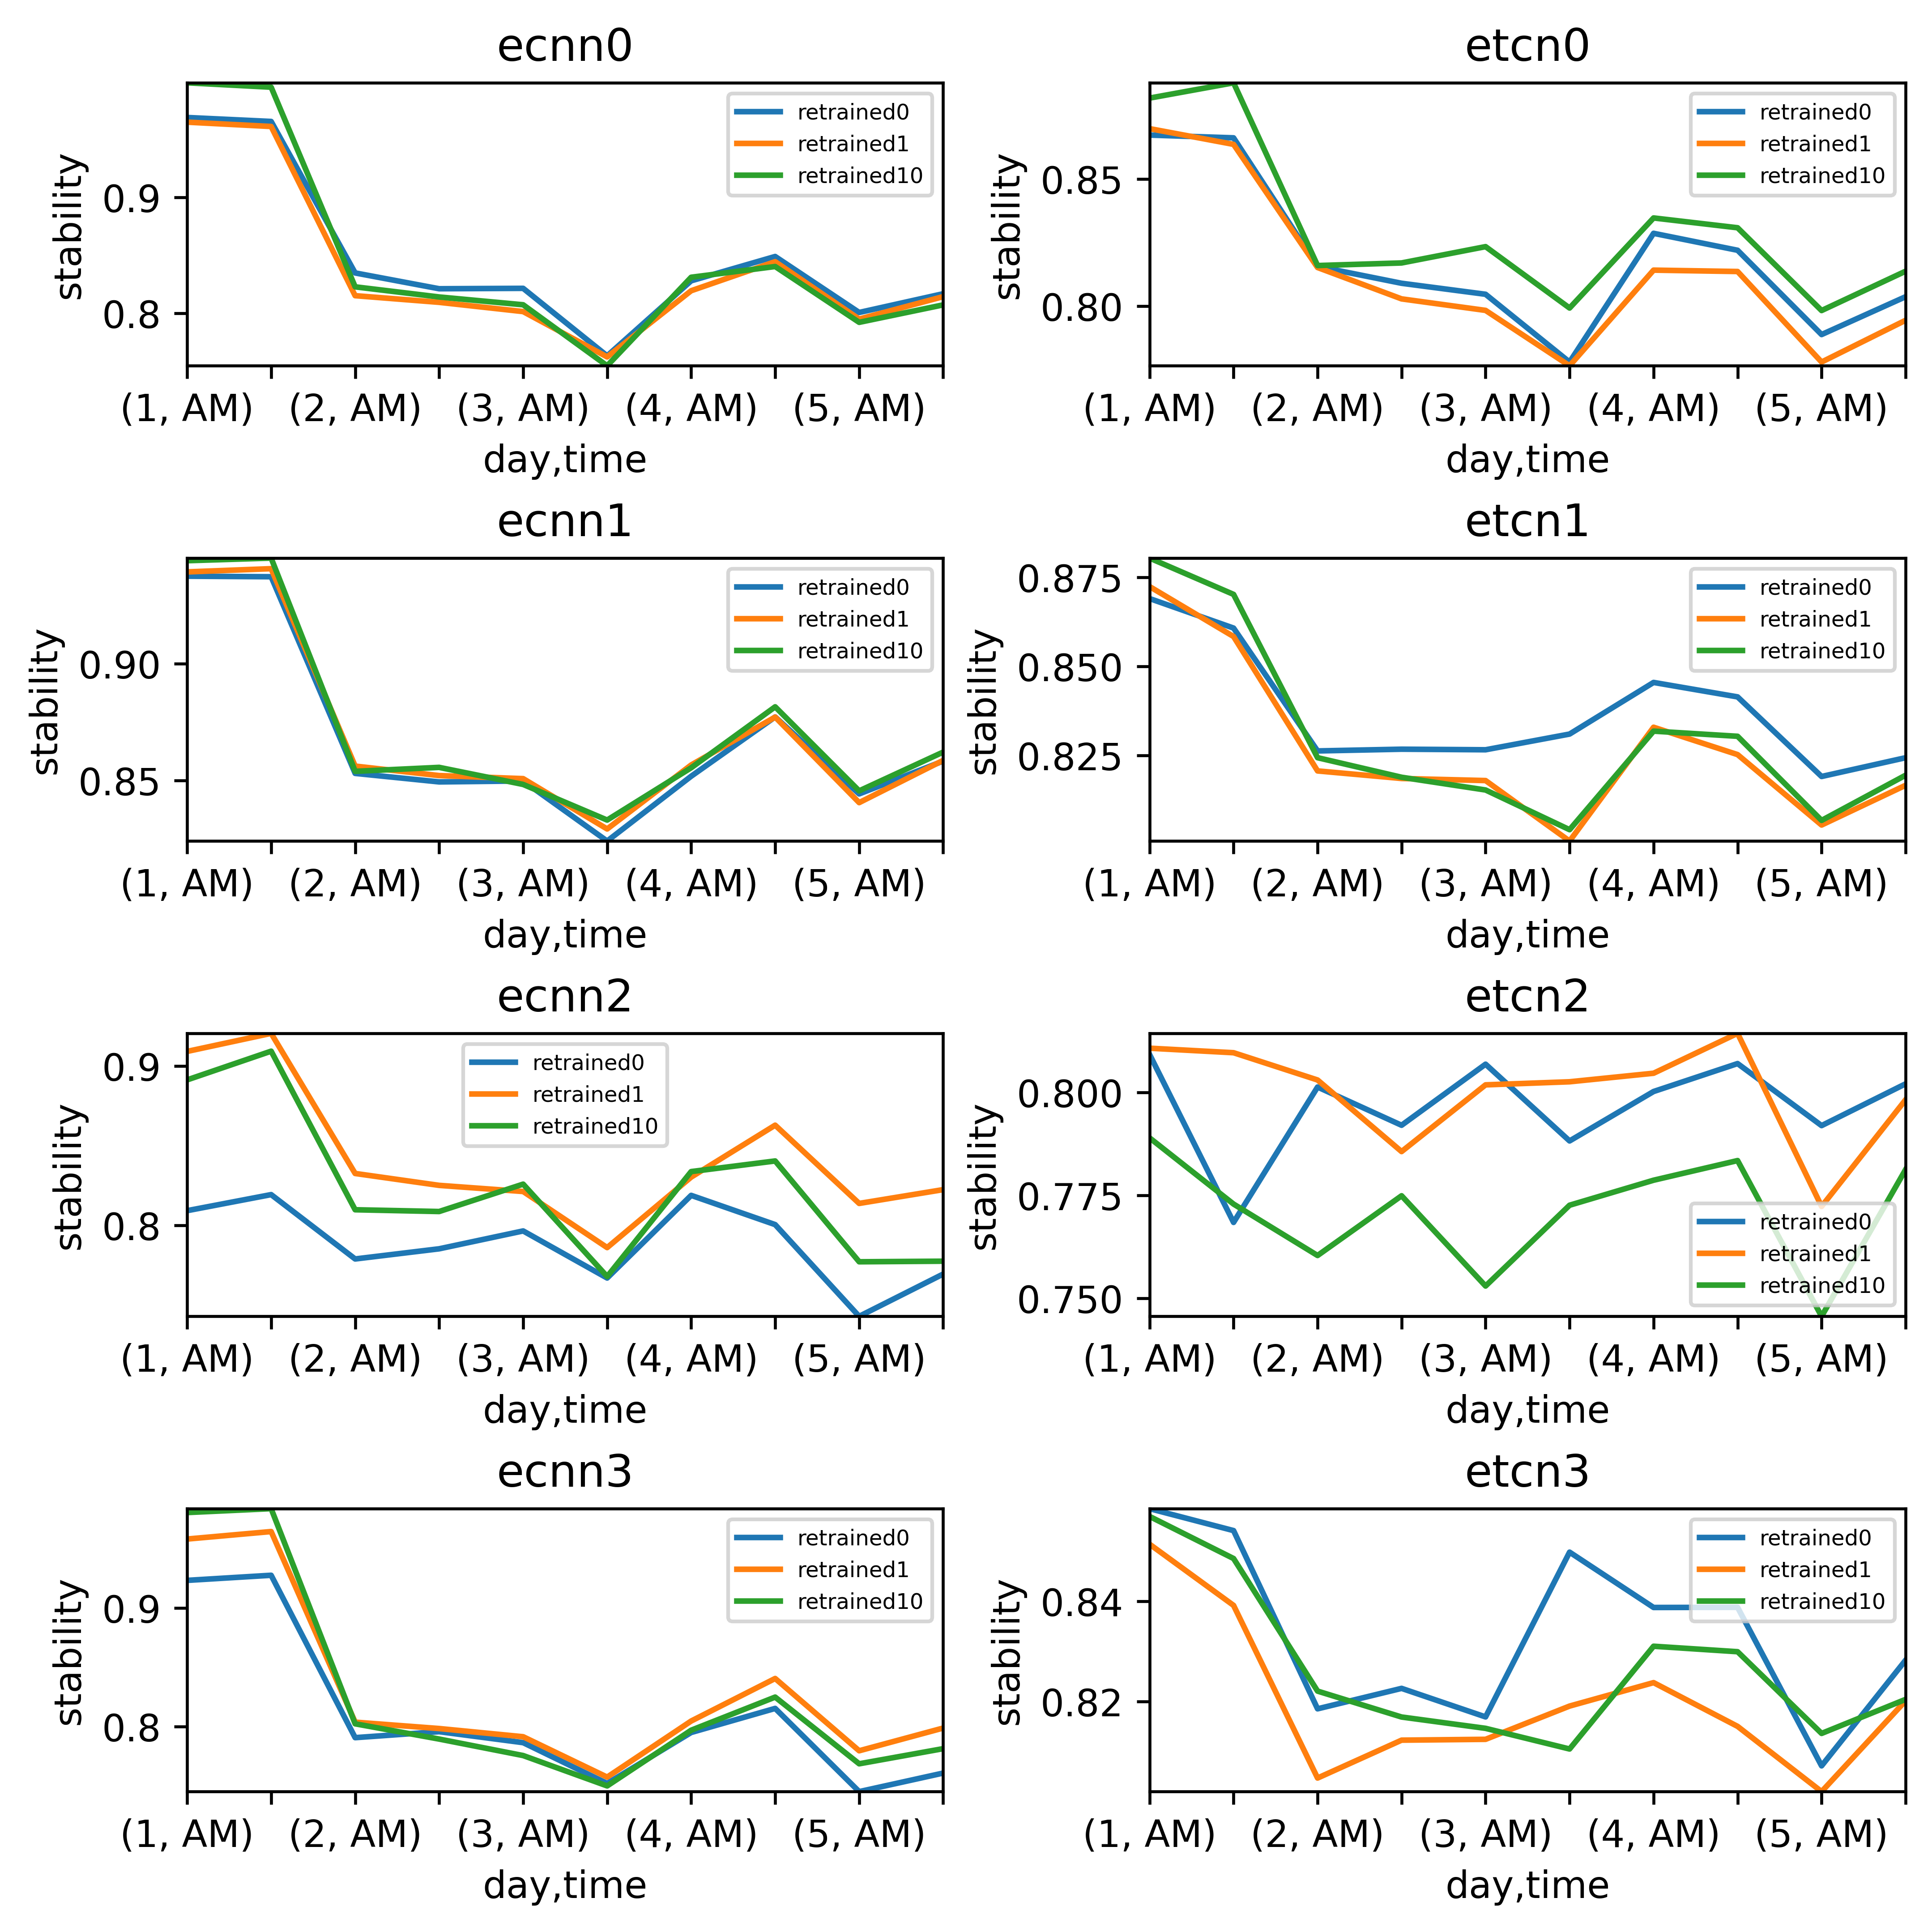

In [7]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(4,2, figsize = (7.08, 7.08), constrained_layout=True,dpi=600)
#df_acc.groupby(['day','model']).mean().unstack().plot(kind='line', y='acc', ax=ax, rot=45, xticks=[1,2,3,4,5], ylabel='acc')

model_label = ['ecnn0', 'etcn0', 'ecnn1', 'etcn1', 'ecnn2', 'etcn2', 'ecnn3', 'etcn3']


for i,j in enumerate(np.reshape(model_label,(4,2))):
    for m,n in enumerate(j):
        df_stability_summary[n].plot(kind='line', ylabel='stability', ax=ax[i,m])
        df_stability_summary1[n].plot(kind='line', ylabel='stability', ax=ax[i,m])
        df_stability_summary10[n].plot(kind='line', ylabel='stability', ax=ax[i,m])
        ax[i,m].xaxis.set_major_locator(MaxNLocator(10))
        ax[i,m].autoscale(tight=True)
        #ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
        ax[i,m].legend(['retrained0', 'retrained1', 'retrained10'], loc='best', fontsize='xx-small')
        ax[i,m].set_title(n)
plt.savefig("./analysis/line-stability-retraining-compared.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)

In [8]:
filename = './analysis/acc_report.csv' 
df_acc = pd.read_csv(filename)
df_acc_summary = df_acc.groupby(by=['day', 'time','model']).mean().unstack()['acc']


filename = './analysis/acc_report1.csv' 
df_acc1 = pd.read_csv(filename)
df_acc_summary1 = df_acc1.groupby(by=['day', 'time','model']).mean().unstack()['acc']

filename = './analysis/acc_report10.csv' 
df_acc10 = pd.read_csv(filename)
df_acc_summary10 = df_acc10.groupby(by=['day', 'time','model']).mean().unstack()['acc']

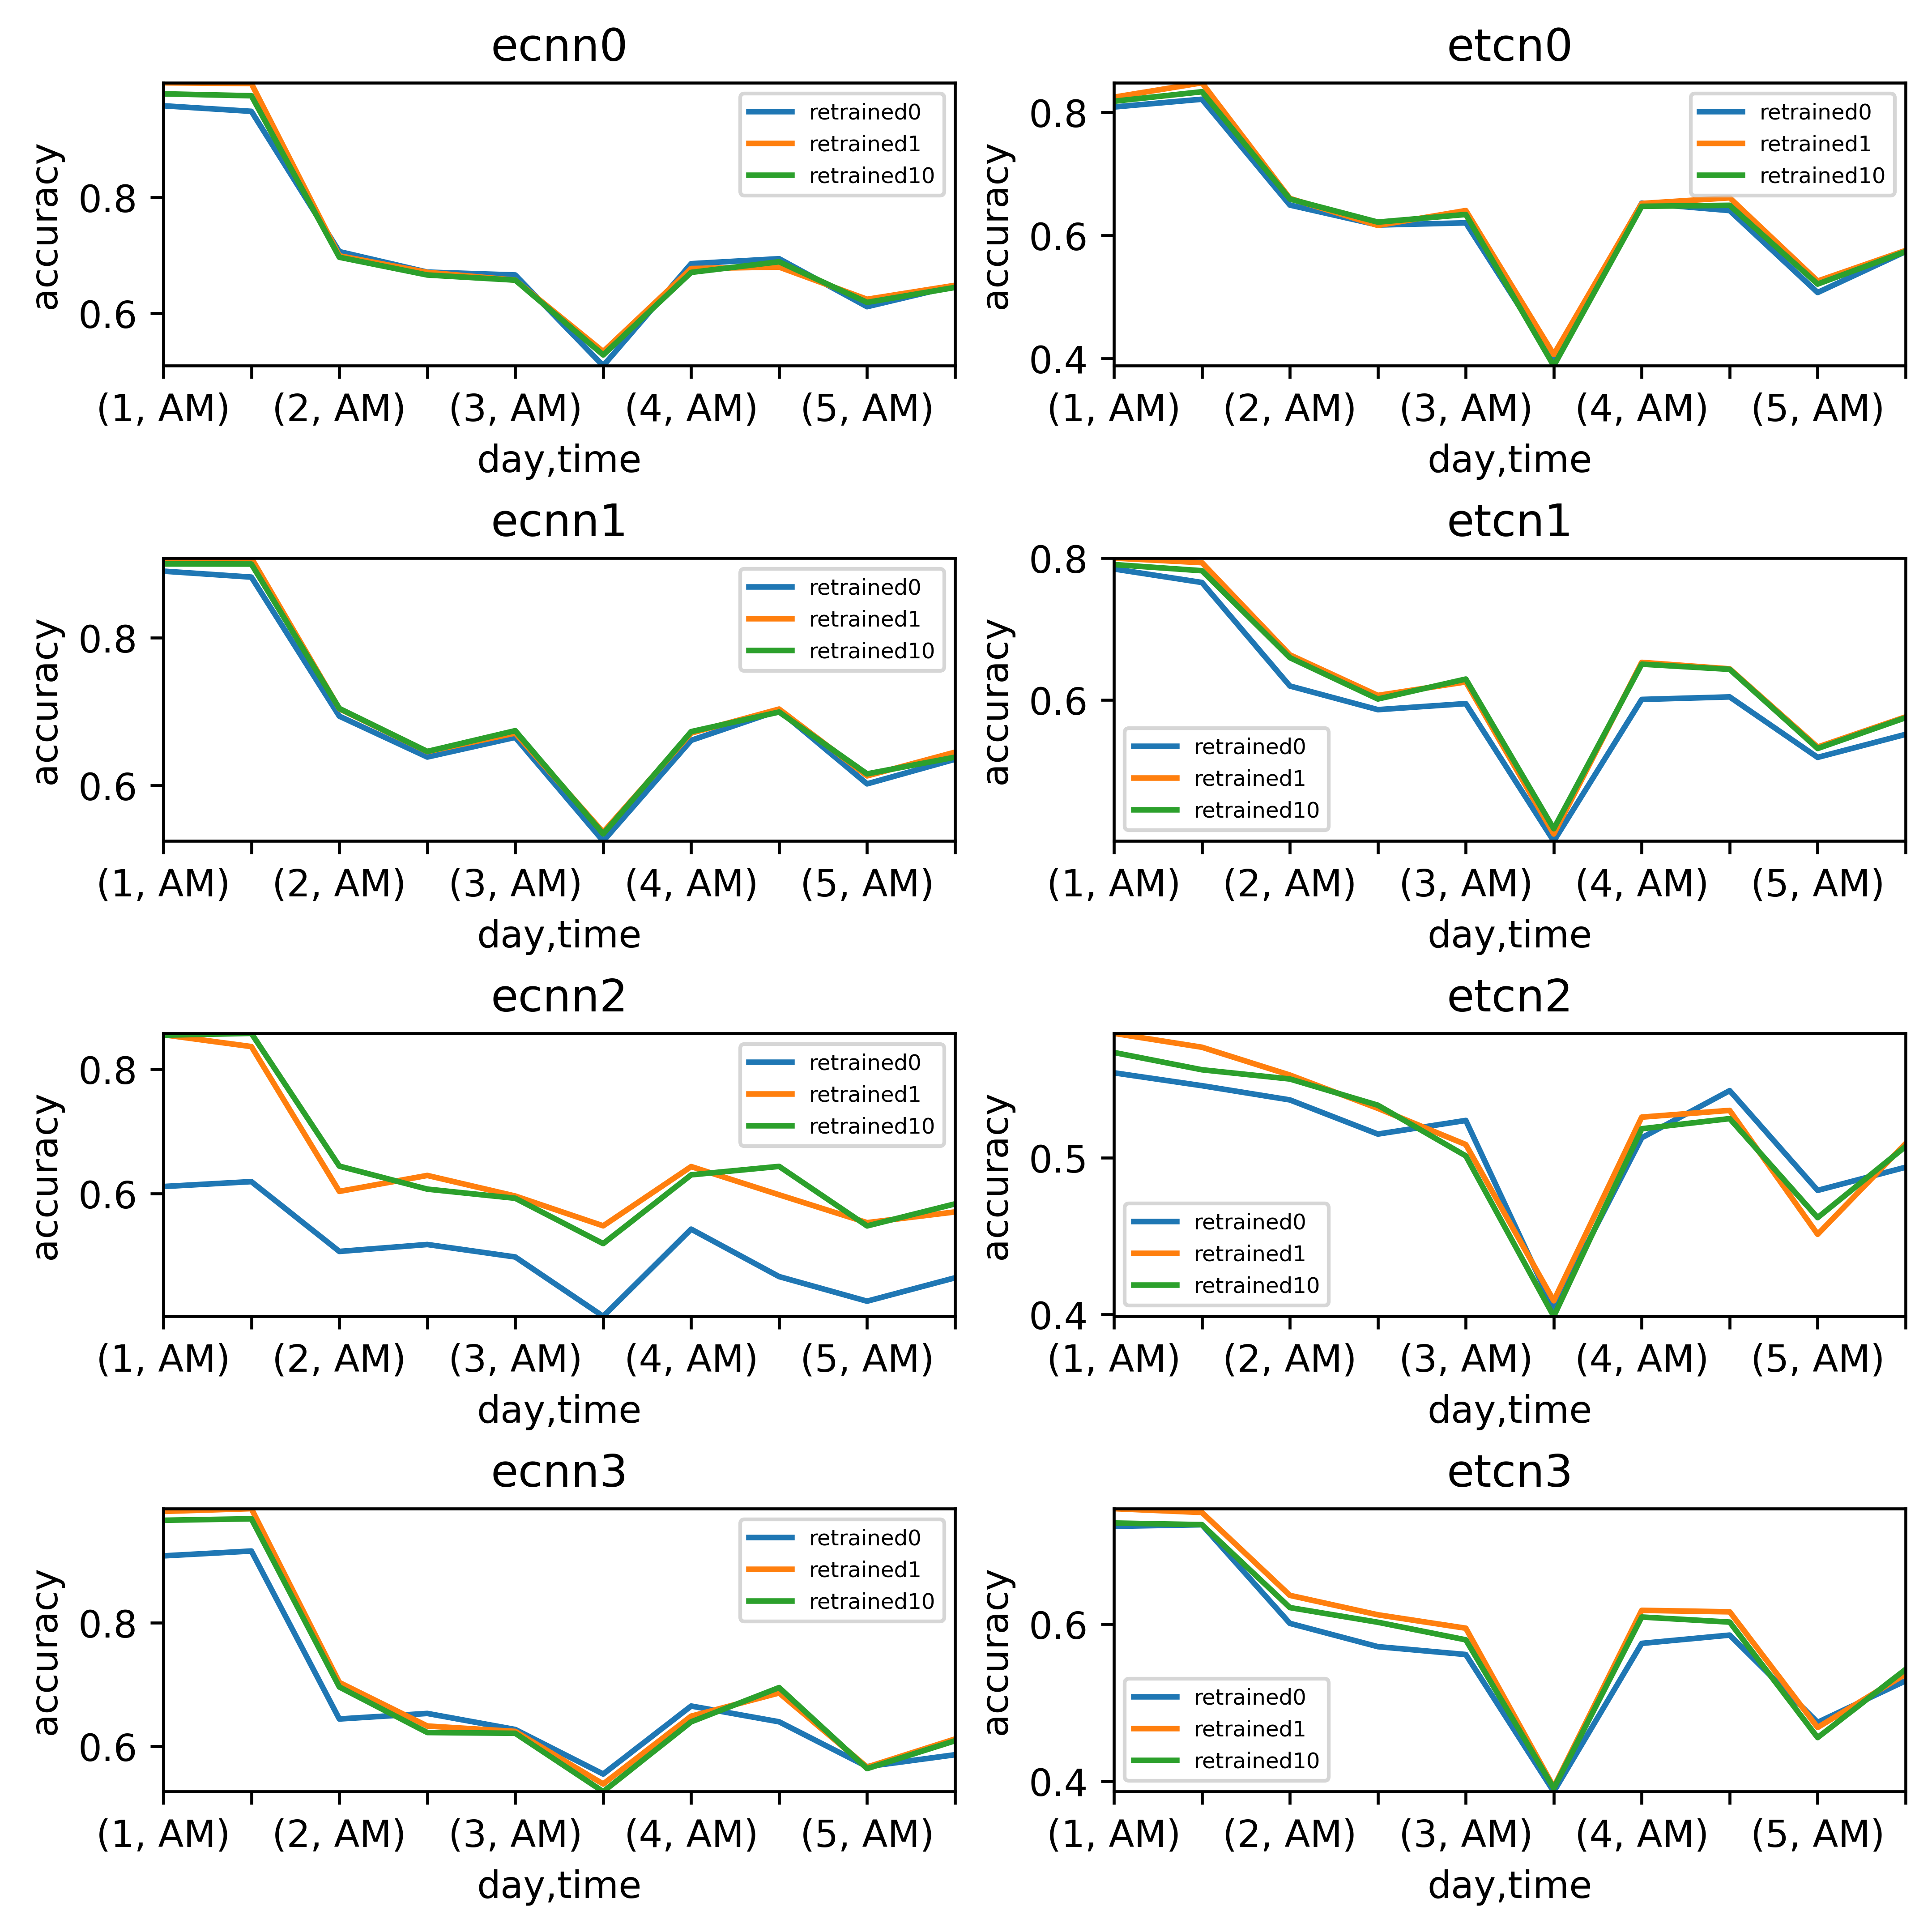

In [9]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(4,2, figsize = (7.08, 7.08), constrained_layout=True,dpi=600)
#df_acc.groupby(['day','model']).mean().unstack().plot(kind='line', y='acc', ax=ax, rot=45, xticks=[1,2,3,4,5], ylabel='acc')

model_label = ['ecnn0', 'etcn0', 'ecnn1', 'etcn1', 'ecnn2', 'etcn2', 'ecnn3', 'etcn3']


for i,j in enumerate(np.reshape(model_label,(4,2))):
    for m,n in enumerate(j):
        df_acc_summary[n].plot(kind='line', ylabel='accuracy', ax=ax[i,m])
        df_acc_summary1[n].plot(kind='line', ylabel='accuracy', ax=ax[i,m])
        df_acc_summary10[n].plot(kind='line', ylabel='accuracy', ax=ax[i,m])
        ax[i,m].xaxis.set_major_locator(MaxNLocator(10))
        ax[i,m].autoscale(tight=True)
        #ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
        ax[i,m].legend(['retrained0', 'retrained1', 'retrained10'], loc='best', fontsize='xx-small')
        ax[i,m].set_title(n)
plt.savefig("./analysis/line-acc-retraining-compared.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)

In [10]:
filename = './analysis/reliability_report.csv' 
df_reliability = pd.read_csv(filename)
df_reliability_summary = df_reliability.groupby(by=['day', 'time','model']).mean().unstack()['overall']


filename = './analysis/reliability_report1.csv' 
df_reliability1 = pd.read_csv(filename)
df_reliability_summary1 = df_reliability1.groupby(by=['day', 'time','model']).mean().unstack()['overall']

filename = './analysis/reliability_report10.csv' 
df_reliability10 = pd.read_csv(filename)
df_reliability_summary10 = df_reliability10.groupby(by=['day', 'time','model']).mean().unstack()['overall']

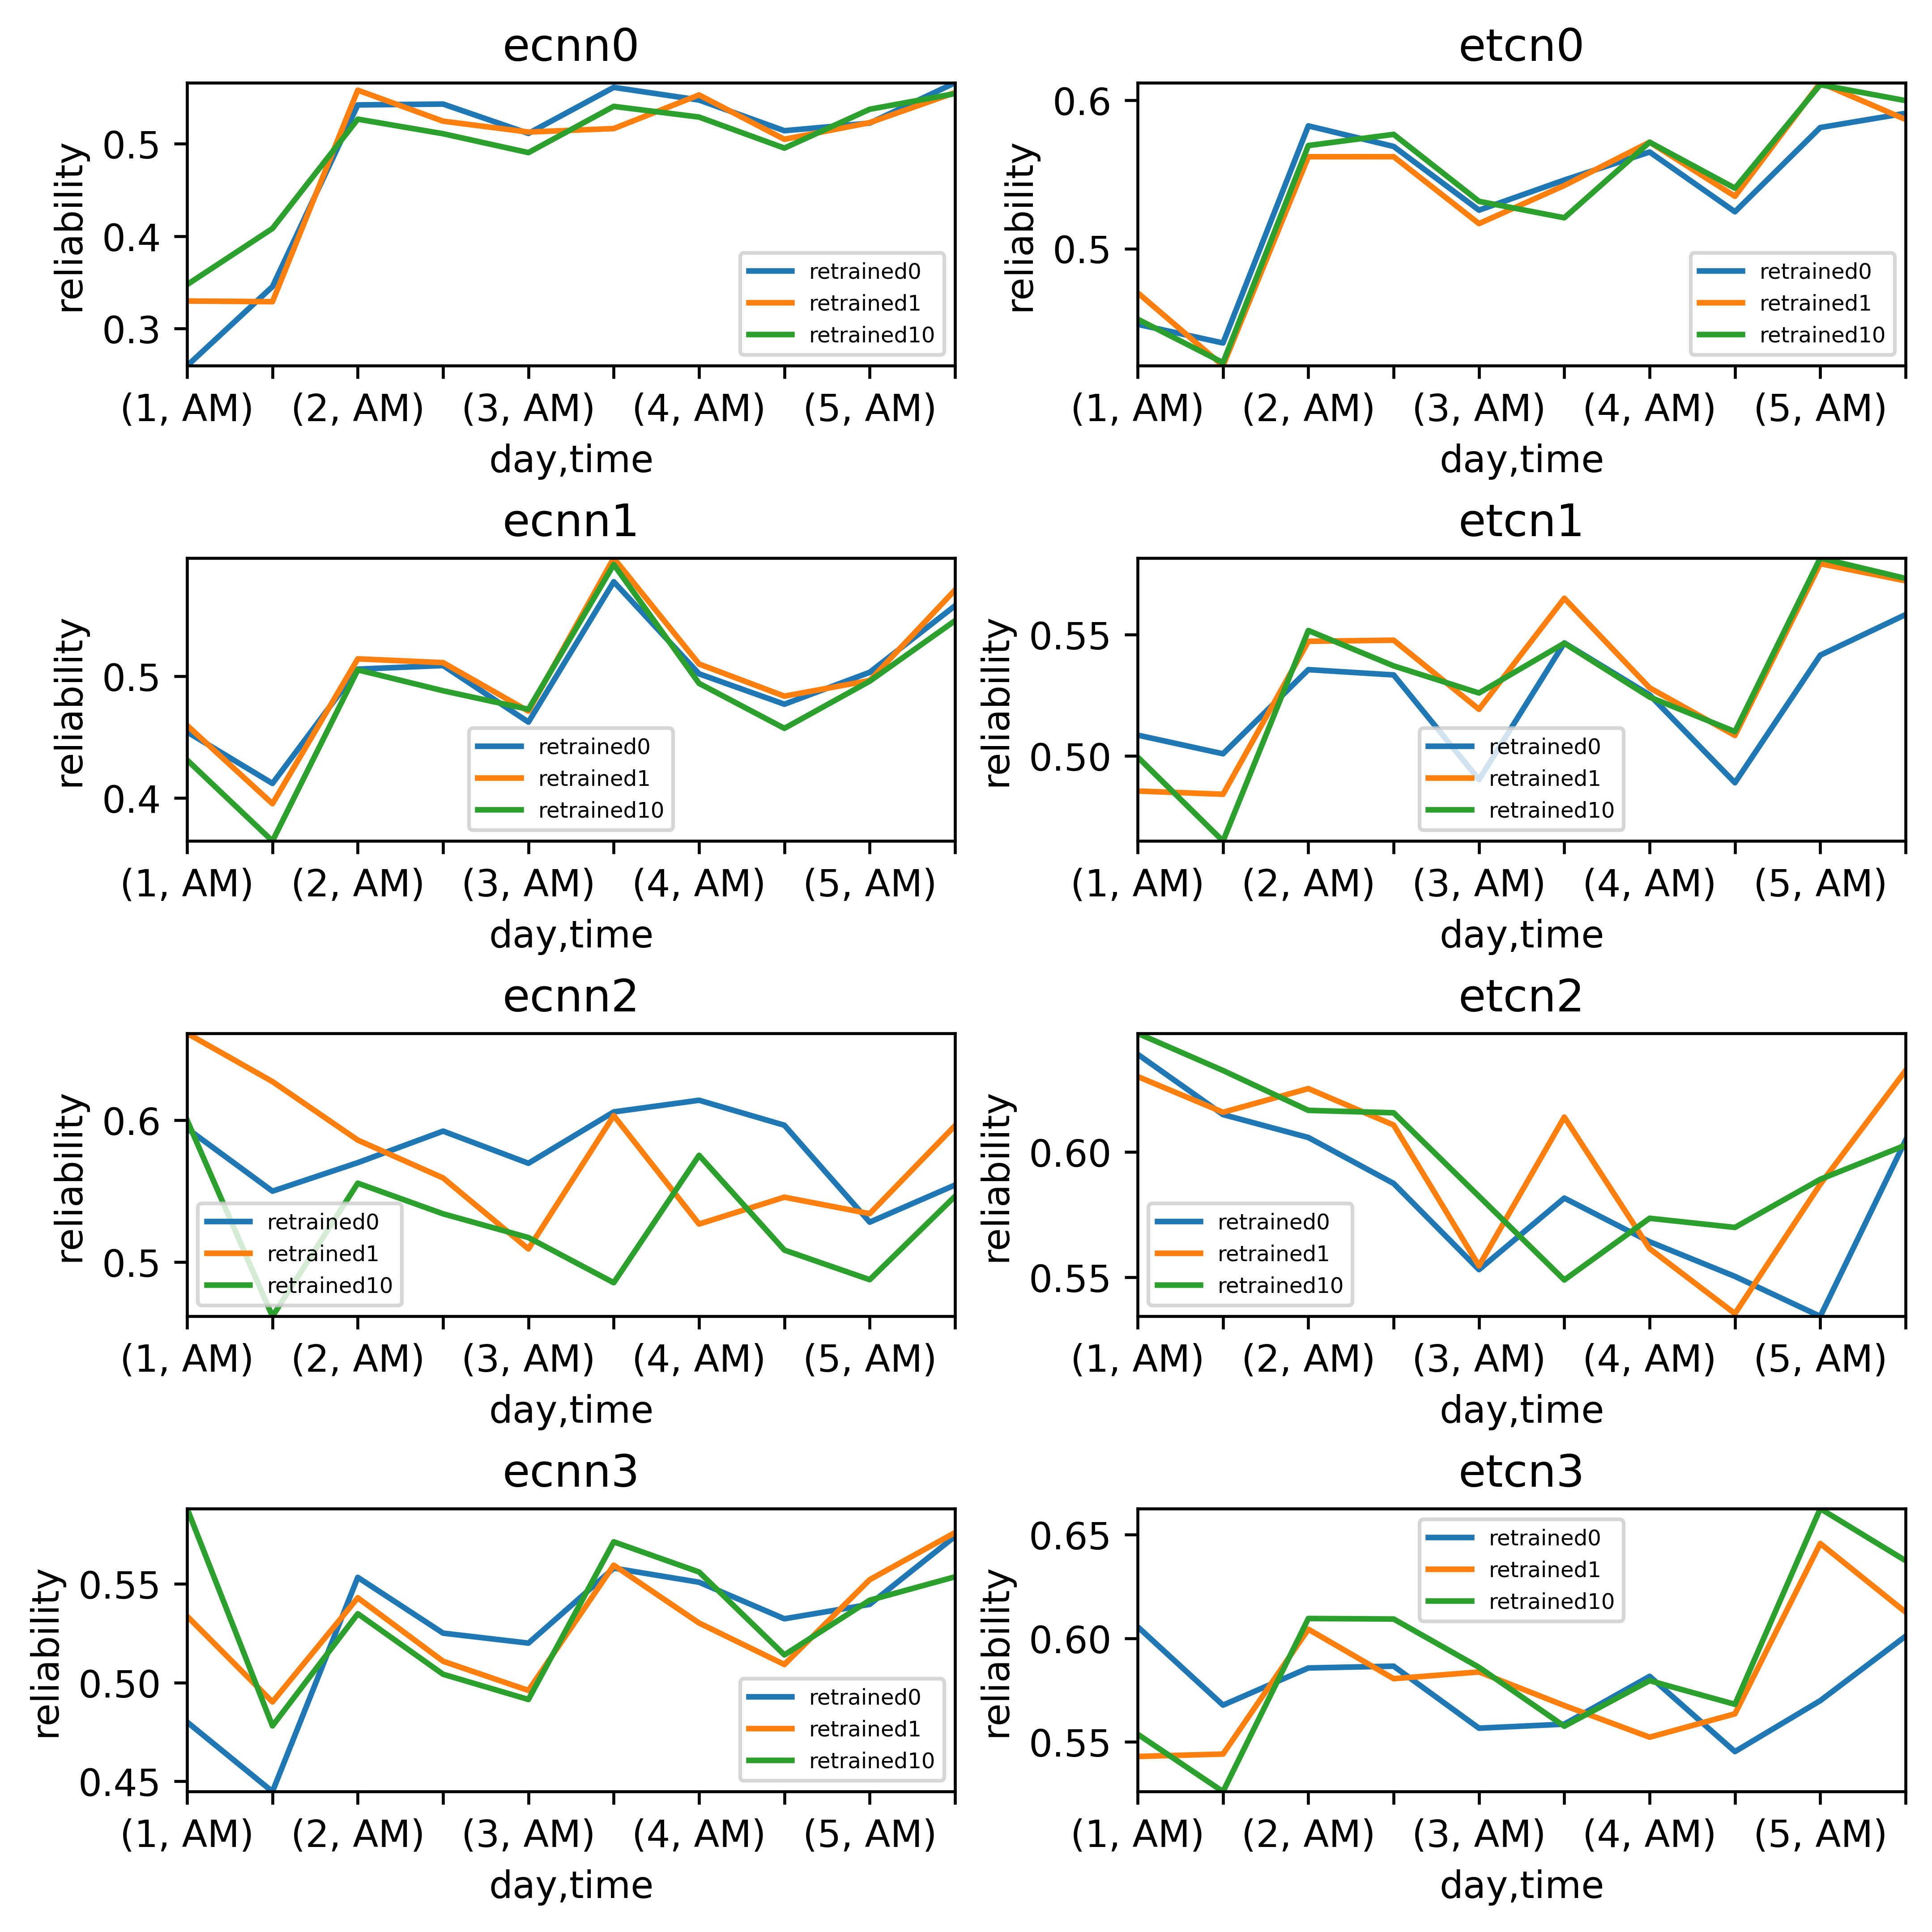

In [11]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(4,2, figsize = (7.08, 7.08), constrained_layout=True,dpi=600)
#df_acc.groupby(['day','model']).mean().unstack().plot(kind='line', y='acc', ax=ax, rot=45, xticks=[1,2,3,4,5], ylabel='acc')

model_label = ['ecnn0', 'etcn0', 'ecnn1', 'etcn1', 'ecnn2', 'etcn2', 'ecnn3', 'etcn3']


for i,j in enumerate(np.reshape(model_label,(4,2))):
    for m,n in enumerate(j):
        df_reliability_summary[n].plot(kind='line', ylabel='reliability', ax=ax[i,m])
        df_reliability_summary1[n].plot(kind='line', ylabel='reliability', ax=ax[i,m])
        df_reliability_summary10[n].plot(kind='line', ylabel='reliability', ax=ax[i,m])
        ax[i,m].xaxis.set_major_locator(MaxNLocator(10))
        ax[i,m].autoscale(tight=True)
        #ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
        ax[i,m].legend(['retrained0', 'retrained1', 'retrained10'], loc='best', fontsize='xx-small')
        ax[i,m].set_title(n)
plt.savefig("./analysis/line-reliability-retraining-compared.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)

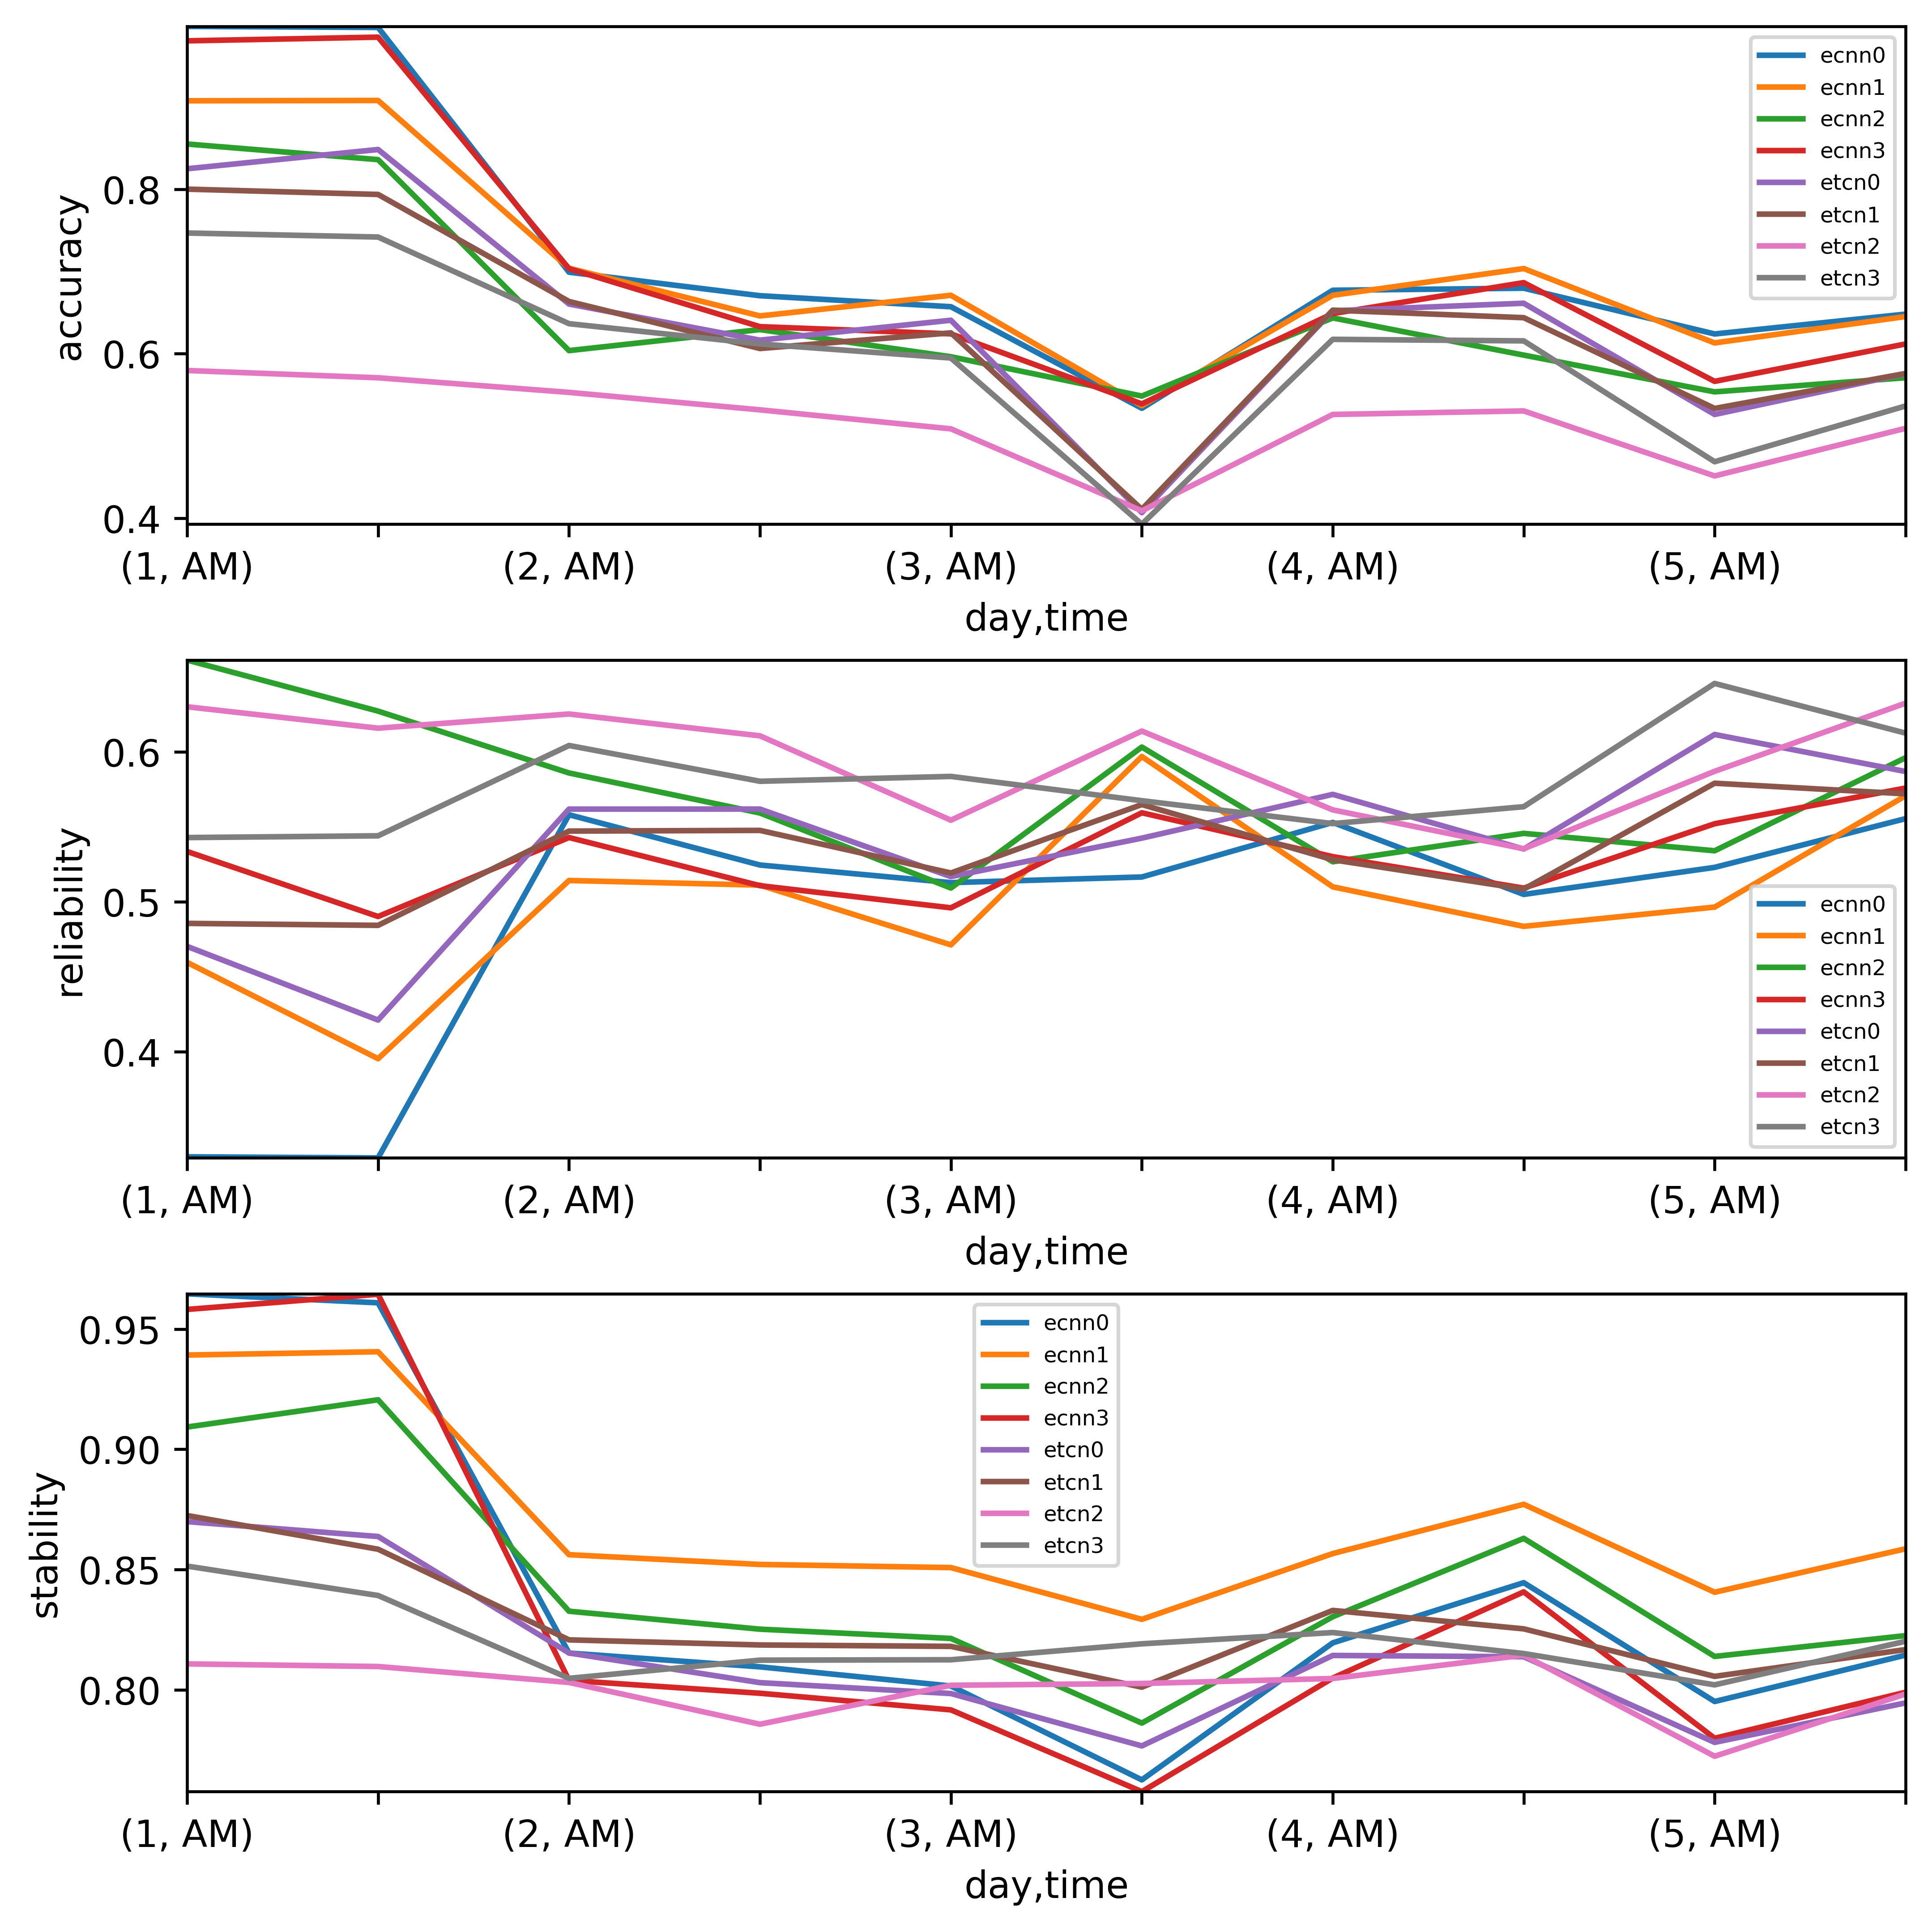

In [17]:

fig, ax = plt.subplots(3,1, figsize = (7.08, 7.08), constrained_layout=True,dpi=600)
#df_acc.groupby(['day','model']).mean().unstack().plot(kind='line', y='acc', ax=ax, rot=45, xticks=[1,2,3,4,5], ylabel='acc')
df_acc_summary1.plot(kind='line', ylabel='accuracy', ax=ax[0])
ax[0].xaxis.set_major_locator(MaxNLocator(10))
ax[0].autoscale(tight=True)
#ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
ax[0].legend(loc='best', fontsize='xx-small')

df_reliability_summary1.plot(kind='line', ylabel='reliability', ax=ax[1])
ax[1].xaxis.set_major_locator(MaxNLocator(10))
ax[1].autoscale(tight=True)
#ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
ax[1].legend(loc='best', fontsize='xx-small')

df_stability_summary1.plot(kind='line', ylabel='stability', ax=ax[2])
ax[2].xaxis.set_major_locator(MaxNLocator(10))
ax[2].autoscale(tight=True)
#ax.xaxis.set_ticks([(1,2,3,4,5), ('AM','PM')])  
ax[2].legend(loc='best', fontsize='xx-small')

plt.savefig("./analysis/line-retrained1-model-compared.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)

In [303]:
import src.utils
with open("hpo_search.yaml", 'r') as f:
    cfg = edict(yaml.load(f, Loader=yaml.SafeLoader))

TCN_USED = False
if TCN_USED:
    model = utils.TCN(input_size=cfg.DATA_CONFIG.channel_n, output_size=n_class, num_channels=cfg.HP.tcn_channels, kernel_size=cfg.HP.kernel_size, dropout=cfg.HP.dropout_rate)
else:
    model = utils.Model(number_of_class=n_class, dropout=cfg.HP.dropout_rate)

ModuleNotFoundError: No module named 'helps_pro'